# Restaurant Food Cost Prediction

# 1. Introduction

# Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.


# Dataset Attributes

- **TITLE**: The type of restaurant, helping to identify its specialty.
- **RESTAURANT_ID**: A unique identifier for each restaurant.
- **CUISINES**: The variety of cuisines offered by the restaurant.
- **TIME**: The operating hours of the restaurant.
- **CITY**: The city where the restaurant is located.
- **LOCALITY**: The specific locality within the city where the restaurant is situated.
- **RATING**: The average rating given to the restaurant by customers.
- **VOTES**: The total number of votes received by the restaurant.
- **COST**: The average cost of a two-person meal at the restaurant.


1. **train.csv**: This dataset contains details related to restaurant food costs, as well as the target variable "cost." You'll use this dataset to train your machine learning model.
2. **test.csv**: Once your model is trained, you'll use it to predict the cost of a two-person meal using this dataset.

the task involves utilizing data science techniques to investigate factors that affect the cost of food at these restaurants and building a machine learning model to predict these costs accurately. This project offers an opportunity to gain insights that could assist people in making informed decisions about where to eat and what to expect in terms of cost.

# 2. Data Cleaning

# Import important library :

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor


In [121]:
df= pd.read_excel(r"C:/Users/JAVED/Saved Games/Data_Train.xlsx")

In [122]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [123]:
df.head()#first 5 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [124]:
df[270:280]#middle 10 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
270,BEVERAGE SHOP,7741,"Beverages, Desserts, Fast Food",11am – 4am (Mon-Sun),Bangalore,Doddathoguru Electronic City,NEW,NaN,200
271,CAFÉ,12822,"Cafe, Beverages, Fast Food, Sandwich, Salad, C...",11am – 1am (Mon-Sun),Chembur.,Tilak Nagar,4.2,842 votes,300
272,CASUAL DINING,12727,"South Indian, North Indian, Chinese",7:30am – 10:30pm (Mon-Sun),Chennai,GST Road,3.0,161 votes,550
273,QUICK BITES,11253,"Biryani, North Indian, Kebab",11am – 4am (Mon-Sun),Bangalore,BTM 1 Stage BTM,3.9,221 votes,600
274,"CASUAL DINING,BAR",2387,"Continental, Italian, Seafood, North Indian, Cafe",11am – 12midnight (Mon-Sun),Maharashtra,Mumbai,4.2,309 votes,2000
275,QUICK BITES,3048,Fast Food,11am – 11pm (Mon-Sun),Chennai,Nungambakkam,3.3,138 votes,350
276,QUICK BITES,13852,"North Indian, Chinese, Mughlai, Continental",11am – 11pm (Mon-Sun),Faridabad,Sector 15,4.1,145 votes,500
277,CASUAL DINING,11746,"North Indian, Chinese, Seafood, Biryani",11am – 12midnight (Mon-Sun),Mumbai,Vile Parle East,3.8,297 votes,750
278,NaN,815,"North Indian, Mughlai, Chinese","12noon – 4pm, 6pm – 11pm (Mon-Sun)",New Delhi,Vasant Kunj,4.0,212 votes,600
279,QUICK BITES,9559,"North Indian, Chinese, Continental","Closed (Mon),7pm – 7am (Tue-Sun)",Chennai,Ramapuram,2.9,227 votes,600


In [125]:
df.tail()#last 5 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [126]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [127]:
len(df.columns)

9

# Exploratory Data Analysis (EDA)

In [128]:
df.shape

(12690, 9)

The dataset consists of 12690 rows and 9 columns, which include both features and labels.

In [129]:
df.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Missing values were detected in the columns TITLE, CITY, and VOTES in our dataset.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Except for theRESTAURANT_ID and  COST  column, all other columns contain object data types, and missing values are present in the dataset.

In [131]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,11687,12690,12690,12578,12592,12688,11486
unique,112,4155,2689,359,1416,32,1847
top,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes
freq,4218,532,1415,2174,166,1238,71


In [132]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000



  - The count indicates that there are also 12,690 entries.
  - The mean (average) cost is approximately 655.25.
  - The standard deviation (std) is around 627.00, indicating the spread of costs around the mean.
  - The minimum cost is 20, indicating the lowest recorded cost.
  - The 25th percentile (Q1) is 300, which means 25% of the data lies below this cost.
  - The median (50th percentile or Q2) is 500, which is the middle value of the sorted costs.
  - The 75th percentile (Q3) is 800, indicating that 75% of the data lies below this cost.
  - The maximum cost is 14,000, which represents the highest recorded cost.



In [133]:
df.duplicated().sum()

25

dropping duplicate rows from DataFrame

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.duplicated().sum()

0

In [136]:
df.reset_index(inplace=True)

In [137]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
index,12665
TITLE,112
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [138]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

index
0        1
8441     1
8443     1
8444     1
8445     1
        ..
4226     1
4227     1
4228     1
4229     1
12689    1
Name: count, Length: 12665, dtype: int64
/n
TITLE
QUICK BITES               4211
CASUAL DINING             3645
CAFÉ                       606
DESSERT PARLOR             381
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64
/n
RESTAURANT_ID
7264     8
4634     7
9910     6
7745     5
4058     5
        ..
11517    1
7773     1
9982     1
13577    1
6134     1
Name: count, Length: 11892, dtype: int64
/n
CUISINES
South Indian                                532
North Indian                                524
North Indian, Chinese                       500
Fast Food                                   286
Chinese                                     167
            

In [139]:
nul_val=df.isnull()

In [140]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

index
index
False    12665
Name: count, dtype: int64

TITLE
TITLE
False    11665
True      1000
Name: count, dtype: int64

RESTAURANT_ID
RESTAURANT_ID
False    12665
Name: count, dtype: int64

CUISINES
CUISINES
False    12665
Name: count, dtype: int64

TIME
TIME
False    12665
Name: count, dtype: int64

CITY
CITY
False    12553
True       112
Name: count, dtype: int64

LOCALITY
LOCALITY
False    12567
True        98
Name: count, dtype: int64

RATING
RATING
False    12663
True         2
Name: count, dtype: int64

VOTES
VOTES
False    11465
True      1200
Name: count, dtype: int64

COST
COST
False    12665
Name: count, dtype: int64



In [141]:
#Checking null values-
df.isnull().sum()

index               0
TITLE            1000
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [142]:
df.isnull().sum().sum()

2412

We have identified 2412 null values in the dataset that need to be replaced.

<Axes: >

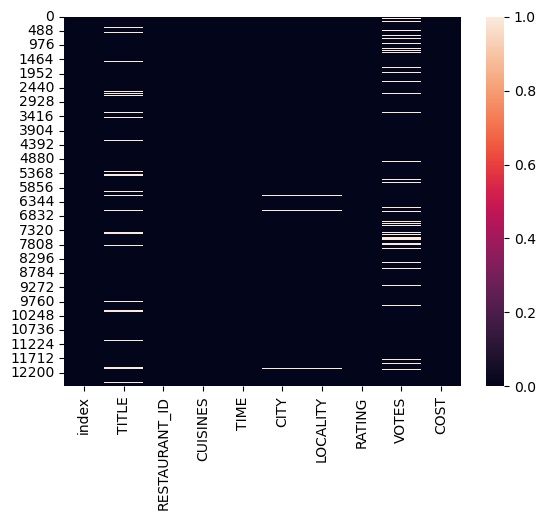

In [143]:
sns.heatmap(df.isnull())

In [144]:
# Removing nan values from the dataset-
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [145]:
df.isnull().sum().sum()

0

It appears that NaN values have been successfully replaced in the dataset.

<Axes: >

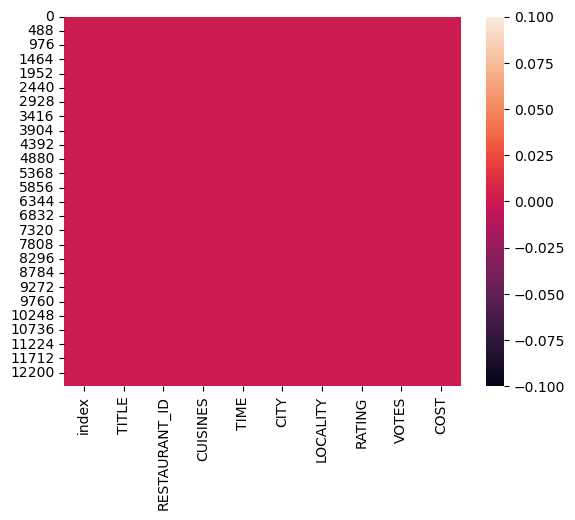

In [146]:
sns.heatmap(df.isnull())

We have no missing values. Looks like we are ready to explore the data visually.

In [147]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)  
df['RATING'].fillna(3.8, inplace=True)  
df['VOTES'].fillna(0.0, inplace=True) 

In [148]:
df['COST'] = df['COST'].astype(float)


In [149]:
df

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...,...
12660,12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500.0
12661,12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800.0
12662,12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300.0
12663,12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400.0


In [150]:
df.isnull().sum()

index            0
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [151]:
df.isna().sum()

index            0
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

# TITLE:

- The TITLE feature categorizes the type of food establishment.
- It distinguishes whether the place is a Casual Diner, Cafe, Bakery, or another type of establishment.

In [152]:
df.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
      

- The column contains a significant amount of repeated data.
- Titles such as Casual-Dining, Fine-Dining, and Dining are essentially the same.
- Many unique titles exist due to variations in writing conventions.
- A process called Binning will be implemented to standardize titles. For example, Cafe and Irani Cafe will be merged into just Cafe.

In [153]:
# Binning CASUAL DINING
dining_title = df[df.TITLE.str.contains('DINING')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=dining_title, value='CASUAL DINING', inplace=True)

# Binning CAFE
cafe_title = df[df.TITLE.str.contains('CAF')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=cafe_title, value='CAFE', inplace=True)

# Binning QUICK BITES
quick_bites_title = df[df.TITLE.str.contains('BITES')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=quick_bites_title, value='QUICK BITES', inplace=True)

# Binning DESSERT PARLOUR
dessert_title = df[df.TITLE.str.contains('DESSERT')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=dessert_title, value='DESSERT PARLOUR', inplace=True)

# Binning BEVERAGE SHOP
bev_title = df[df.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=bev_title, value='BEVERAGE SHOP', inplace=True)


- The column contains significant repetition of data, with titles such as "Casual-Dining," "Fine-Dining," and "Dining" essentially conveying the same meaning.
- Several titles are deemed unique due to slight variations in spelling or wording, despite representing the same concept.
- As a simplification process, we will consolidate "Cafe" and "Irani Cafe" into a single category labeled as "Cafe," a technique known as "Binning."

In [154]:
# Binning BAR and PUB
bar_titles = df[df['TITLE'].str.contains('BAR|PUB', case=False)].index
df.loc[bar_titles, 'TITLE'] = 'BAR_PUB'

# Binning BAKERY, CONFECTIONARY, and SWEET SHOP
bakery_titles = df[df['TITLE'].str.contains('BAKERY|CONFECTIONERY|SWEET SHOP', case=False)].index
df.loc[bakery_titles, 'TITLE'] = 'BAKERY_SWEETS'

# Binning MICROBREWERY, LOUNGE, and CLUBS
lounge_titles = df[df['TITLE'].str.contains('MICROBREWERY|LOUNGE|CLUB', case=False)].index
df.loc[lounge_titles, 'TITLE'] = 'LOUNGE_CLUB_MICROBREWERY'

# Binning FOOD COURT, FOOD TRUCK, and KIOSK
food_court_titles = df[df['TITLE'].str.contains('FOOD COURT|FOOD TRUCK|KIOSK', case=False)].index
df.loc[food_court_titles, 'TITLE'] = 'FOOD_COURT_TRUCK'

# Binning DHABA and MESS
dhaba_titles = df[df['TITLE'].str.contains('MESS|DHABA|BHOJANALYA', case=False)].index
df.loc[dhaba_titles, 'TITLE'] = 'DHABA_MESS'

# Binning PAAN and MEAT SHOP
paan_titles = df[df['TITLE'].str.contains('PAAN', case=False)].index
df.loc[paan_titles, 'TITLE'] = 'FOOD_COURT_TRUCK'


In [155]:
df.TITLE.replace('None',np.nan,inplace=True)


The title has been condensed into these categories.


In [156]:
df.TITLE.unique()

array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOUR', 'CAFE',
       'LOUNGE_CLUB_MICROBREWERY', 'BAR_PUB', 'BEVERAGE SHOP',
       'BAKERY_SWEETS', 'FOOD_COURT_TRUCK', 'DHABA_MESS', 'MEAT SHOP'],
      dtype=object)

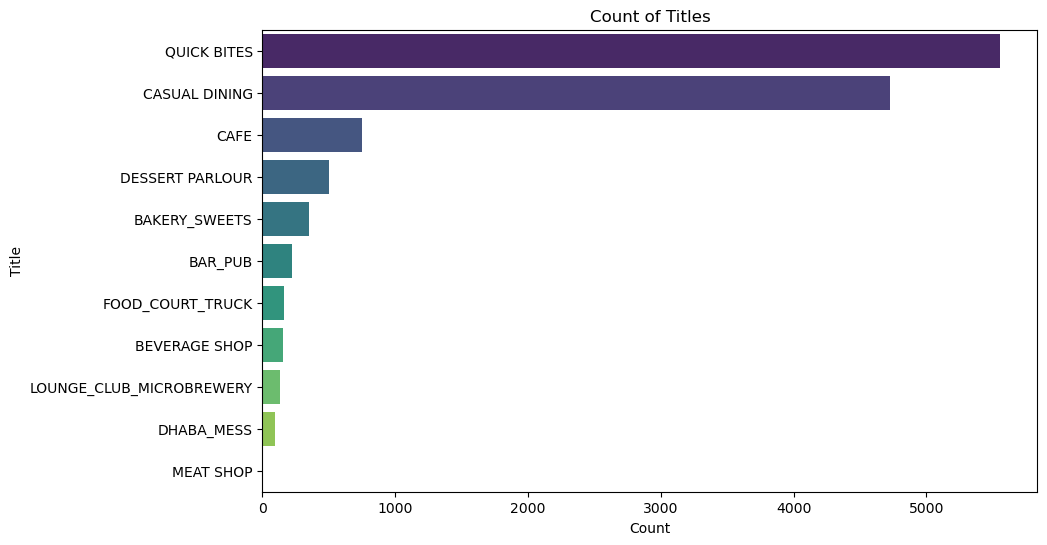

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Count of Titles')
plt.show()


The majority of restaurants are categorized as either Quick Bites or Casual Dining.

# CUISINE


Following the TITLE feature, let's shift our focus to the next feature, CUISINE. The Cuisine feature indicates the types of food or dishes served at a particular restaurant. By examining this feature, we can identify several prominent cuisines.

A restaurant may offer multiple cuisines. Our approach involves creating 8 new binary features, each corresponding to one of the prominent cuisines. These 8 prominent cuisines are: 

- n_indian_cuisine
- s_indian_cuisine
- chinese_cuisine
- bakery_desserts_cuisine
- fast_food_cuisine
- regional_cuisine
- beverage_cuisine
- non_indian_cuisine.

In [158]:
df.CUISINES.unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [159]:
# North Indian Cuisine
df['n_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('North Indian'), 1)
df['n_indian_cuisine'] = df['n_indian_cuisine'].mask(~df['CUISINES'].str.contains('North Indian'), 0)

# South Indian Cuisine
df['s_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('South Indian'), 1)
df['s_indian_cuisine'] = df['s_indian_cuisine'].mask(~df['CUISINES'].str.contains('South Indian'), 0)

# Chinese Cuisine
df['chinese_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Chinese'), 1)
df['chinese_cuisine'] = df['chinese_cuisine'].mask(~df['CUISINES'].str.contains('Chinese'), 0)

# Bakery and Desserts Cuisine
df['bakery_desserts_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Desserts|Ice Cream|Bakery'), 1)
df['bakery_desserts_cuisine'] = df['bakery_desserts_cuisine'].mask(~df['CUISINES'].str.contains('Desserts|Ice Cream|Bakery'), 0)

# Fast Food Cuisine
df['fast_food_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'), 1)
df['fast_food_cuisine'] = df['fast_food_cuisine'].mask(~df['CUISINES'].str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'), 0)

# Regional Cuisine
indian_states = 'your_list_of_indian_states_here'  # Replace with your list of Indian states
df['regional_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)), 1)
df['regional_cuisine'] = df['regional_cuisine'].mask(~df['CUISINES'].str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)), 0)

# Beverage Cuisine
df['beverage_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Beverage|Cafe|Juices'), 1)
df['beverage_cuisine'] = df['beverage_cuisine'].mask(~df['CUISINES'].str.contains('Beverage|Cafe|Juices'), 0)

# Non-Indian Cuisine
df['non_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'), 1)
df['non_indian_cuisine'] = df['non_indian_cuisine'].mask(~df['CUISINES'].str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'), 0)


In [160]:
df.CUISINES.replace('None',np.nan,inplace=True)

The CUISINES has been condensed into these categories.

In [161]:
df.CUISINES.unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

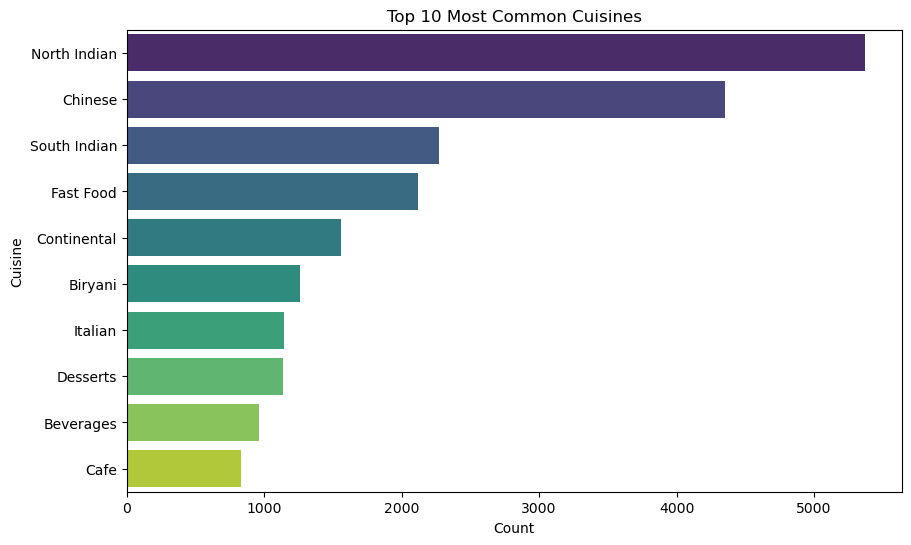

In [162]:
# Count the occurrences of each cuisine
cuisine_counts = df['CUISINES'].str.split(', ', expand=True).stack().value_counts()

# Select the top N most common cuisines
top_n_cuisines = cuisine_counts.head(10)

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_cuisines.values, y=top_n_cuisines.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.show()


Here, we observe that the majority or commonly available cuisines are North Indian and Chinese, often considered the most famous or frequently consumed cuisines by people.

Time:
- Utilizing the TIME feature, we'll identify the days when the restaurant is closed. This will be achieved by constructing a sparse matrix representing the days of the week using the TfidfVectorizer. The values in the matrix will be zero for the days when the restaurant is closed and one otherwise.

# CITY:
- Regarding the CITY variable, we will undertake similar steps as we did for the TITLE variable.

In [163]:
df.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

In [164]:
# Get the top 10 most occurring cities.
top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']
for city in top10_cities:
    print(city)
    temp_city = df[df.CITY.str.contains(city, na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    df.CITY.replace(to_replace=temp_city, value=city, inplace=True)
                            
other_cities = df[~df.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane', na=False)].CITY.value_counts().index
# mapper
df.CITY.replace(to_replace=other_cities, value='Others', inplace=True)


Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai- 600107', 'Chennai - 34 Landmark - Near Loyola College',
       'Chennai Chrompet', 'Chennai-40', 'Chennai Opposite 5C Bus stand',
       'Chennai (Bang Opposite Indian Bank)', 'ECR NEELANKARAI Chennai 600115',
       'Chennai Thousand Lights', 'Chennai Thuraipakkam', 'Chennai Perungudi',
       'Mogappair. Chennai', 'Chennai opp: Vasanth & co', 'Chennai Kovalam',
       'Chennai Padur', 'Chennai - 600040', 'Chennai 600034.',
       'Chennai. (Near Hotel Matshya)'],
      dtype='object', name='CITY')
Bangalore
Index(['Bangalore', 'Bangalore.',
       'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
       'Bangalore Road', 'Malleshwaram Bangalore', 'Bangalore 560076',
       'Phase 1 Bangalore', 'Bangalore land mark above mahaveer hard ware',
       'Bangalore - 560103', 'Bangalore Koramangala 7th Block',
       'Bangalore-560066', 'BTM Bangalore',
      

In [165]:
df.CITY.value_counts()

CITY
Chennai      2310
Bangalore    2163
Mumbai       1897
Hyderabad    1833
New Delhi    1325
Kochi        1296
Others        967
Gurgaon       379
Noida         244
Thane         148
Ghaziabad     103
Name: count, dtype: int64

Initially, we had 450 unique city values, which we reduced to 12 values. This involved grouping all the frequently occurring cities into separate bins, while assigning the remaining unique cities to an "other" category.

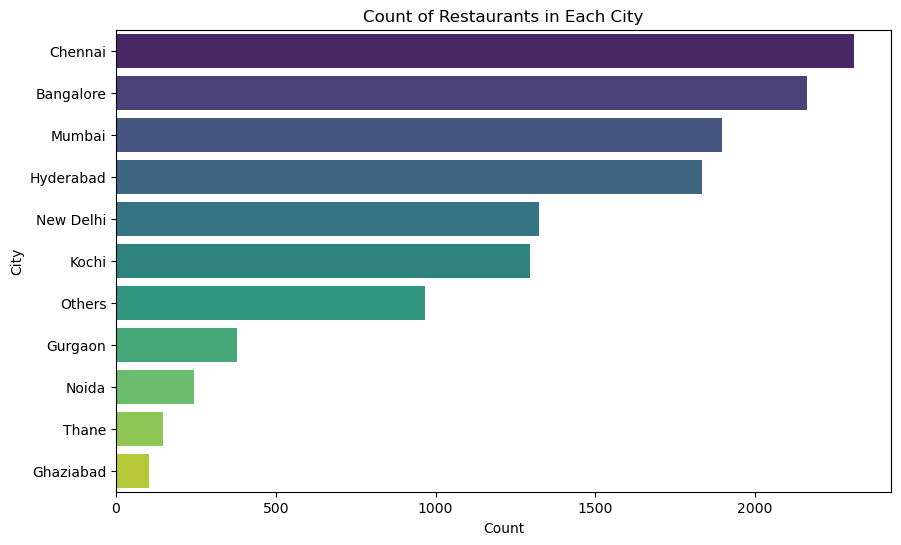

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CITY'], order=df['CITY'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of Restaurants in Each City')
plt.show()



It's noticeable that the majority of hotels belong to Chennai, Bangalore, Mumbai, and Hyderabad cities, respectively.

# LOCALITY
We'll opt to drop the LOCALITY column since nearly all the values in this feature are unique. Given that, it wouldn't significantly influence the cost of food nationwide. However, if we were predicting the average dining price on a state level, the location feature would be more relevant.

In [167]:
df.LOCALITY.value_counts()

LOCALITY
Gachibowli                 264
Indiranagar                137
Edappally                  122
Kakkanad                   121
HSR                        119
                          ... 
Huda Market                  1
OMR Road Sholinganallur      1
Telangana 500053             1
1st Lane                     1
Near Malviya Nagar           1
Name: count, Length: 1416, dtype: int64

In [168]:
# Drop the "LOCALITY" column
df.drop(columns=['LOCALITY'], inplace=True)


# VOTES

VOTES represents the total number of votes provided by customers for a specific restaurant. However, due to the presence of the string "votes" alongside the numerical value, the data type for VOTES is currently object. To clean this data, we need to remove the string and convert the VOTES column to numerical data type.

In [169]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [170]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [171]:
df.VOTES

0          49.0
1          30.0
2         221.0
3          24.0
4         165.0
          ...  
12660     546.0
12661    1214.0
12662     608.0
12663      32.0
12664     677.0
Name: VOTES, Length: 12665, dtype: float64

# Ratings
Ratings reflect the quality of food, restaurant standards, and the types of cuisines served. In our dataset, establishments such as microbreweries, lounges, and clubs tend to receive high ratings, often correlating with higher dining prices. Ratings are typically numerical values ranging from 0 to 5, but in our dataset, the feature is of object datatype. This is due to missing values and the presence of 'New', indicating unrated restaurants, and '-' representing missing data, classified as "Dirty Data". To address this, we'll replace the "Dirty Data" with NaNs and convert the datatype of Ratings to float.

In [172]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [173]:
df['RATING'] = df['RATING'].str.replace('NEW', '3.7')
df['RATING'] = df['RATING'].str.replace('-', '3.7').astype(float)

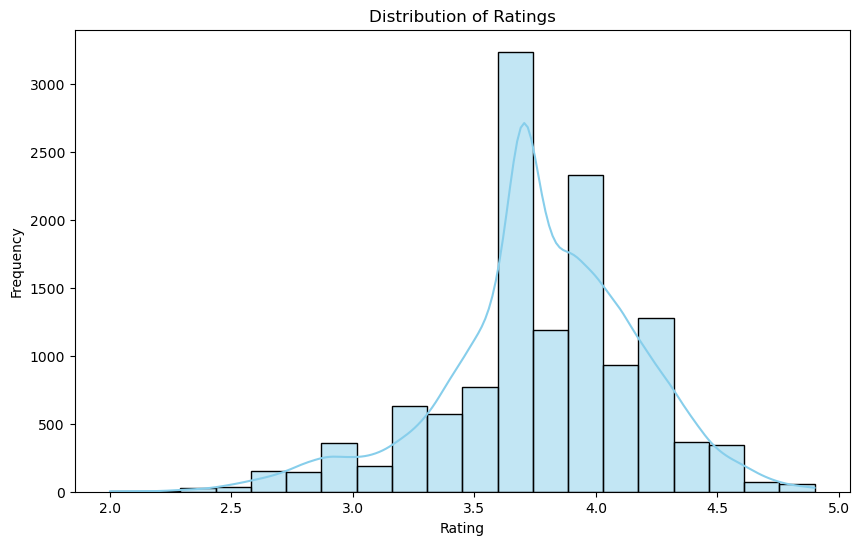

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


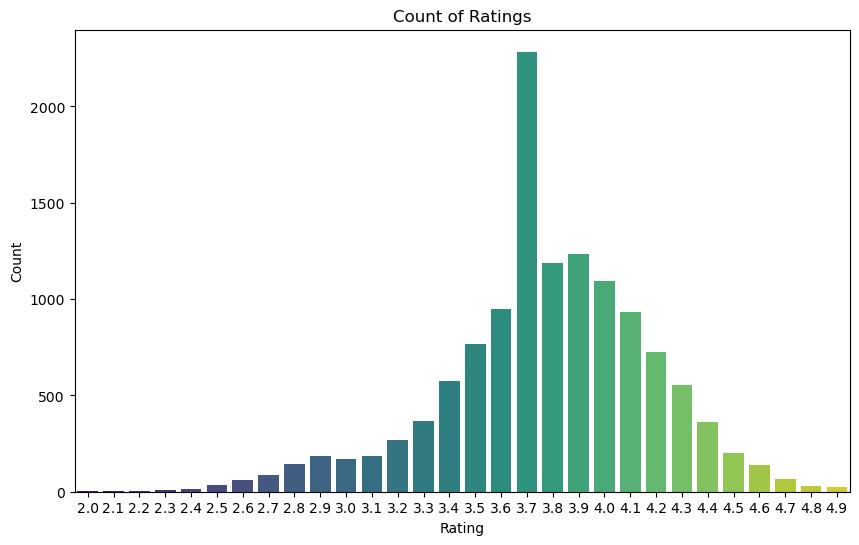

In [175]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RATING', data=df, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.show()


In [176]:
df.isna().sum()

index                      0
TITLE                      0
RESTAURANT_ID              0
CUISINES                   0
TIME                       0
CITY                       0
RATING                     0
VOTES                      0
COST                       0
n_indian_cuisine           0
s_indian_cuisine           0
chinese_cuisine            0
bakery_desserts_cuisine    0
fast_food_cuisine          0
regional_cuisine           0
beverage_cuisine           0
non_indian_cuisine         0
dtype: int64

In [177]:
df

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,3.6,49.0,1200.0,1,0,0,0,0,0,0,0
1,1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,4.2,30.0,1500.0,0,0,0,0,0,0,0,1
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,3.8,221.0,800.0,1,0,1,0,0,1,0,0
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,4.1,24.0,800.0,0,0,1,0,0,0,0,0
4,4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,3.8,165.0,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,3.8,546.0,500.0,1,0,0,0,1,0,0,0
12661,12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,4.3,1214.0,1800.0,0,0,0,0,0,0,0,1
12662,12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Mumbai,4.0,608.0,1300.0,0,0,1,0,1,0,0,1
12663,12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,3.5,32.0,400.0,1,1,1,0,1,0,0,0


In [178]:
df = df.drop('index', axis=1)

In [179]:
df = df.drop('RESTAURANT_ID', axis=1)

In [180]:
df = df.drop('TIME', axis=1)

In [181]:
df = df.drop('CUISINES', axis=1)

In [182]:
df.head()

,TITLE,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,Thane,3.6,49.0,1200.0,1,0,0,0,0,0,0,0
1,CASUAL DINING,Chennai,4.2,30.0,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,Chennai,3.8,221.0,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,Mumbai,4.1,24.0,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,Mumbai,3.8,165.0,300.0,0,0,0,1,0,0,0,0


In [183]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame containing categorical columns
categorical_cols = ['TITLE', 'CITY']

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [184]:
df

,TITLE,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,4,10,3.6,49.0,1200.0,1,0,0,0,0,0,0,0
1,4,1,4.2,30.0,1500.0,0,0,0,0,0,0,0,1
2,4,1,3.8,221.0,800.0,1,0,1,0,0,1,0,0
3,10,6,4.1,24.0,800.0,0,0,1,0,0,0,0,0
4,5,6,3.8,165.0,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,10,4,3.8,546.0,500.0,1,0,0,0,1,0,0,0
12661,4,6,4.3,1214.0,1800.0,0,0,0,0,0,0,0,1
12662,8,6,4.0,608.0,1300.0,0,0,1,0,1,0,0,1
12663,4,1,3.5,32.0,400.0,1,1,1,0,1,0,0,0


# 3. Data Visualization

# Univariate Analysis

In [194]:
# Univariate Analysis
def univariate_analysis():
    # Histogram for numerical variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Count plot for categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

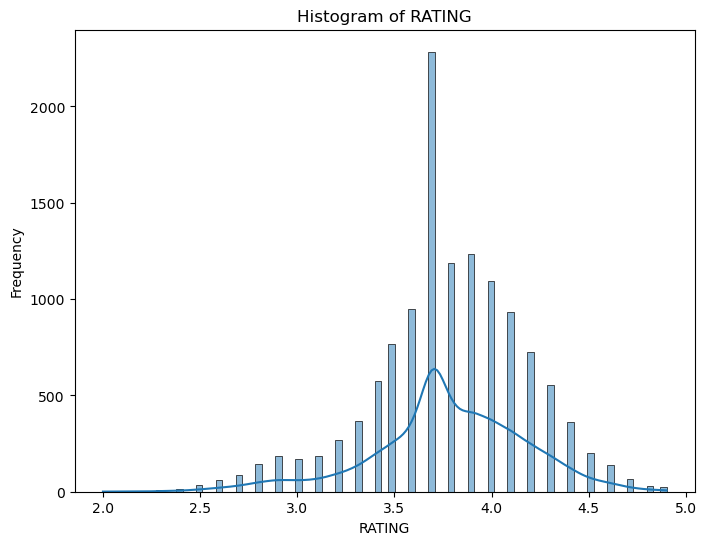

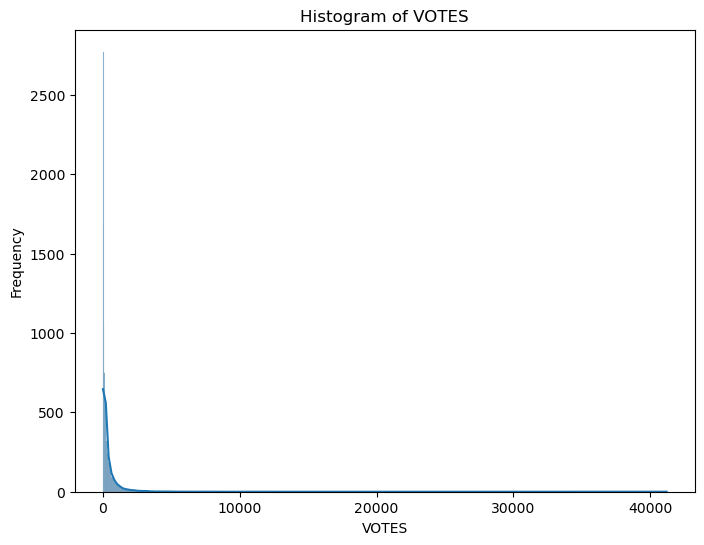

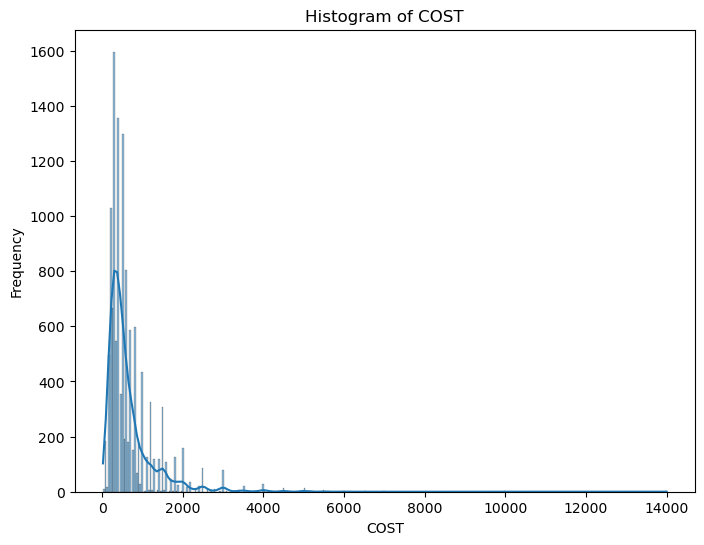

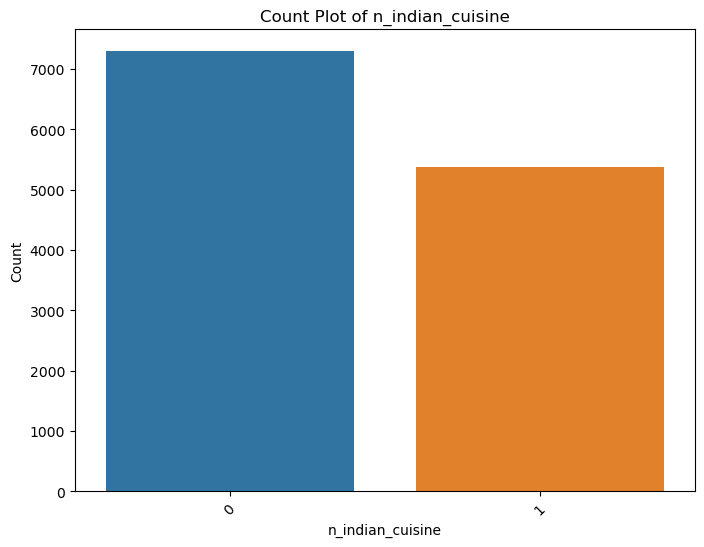

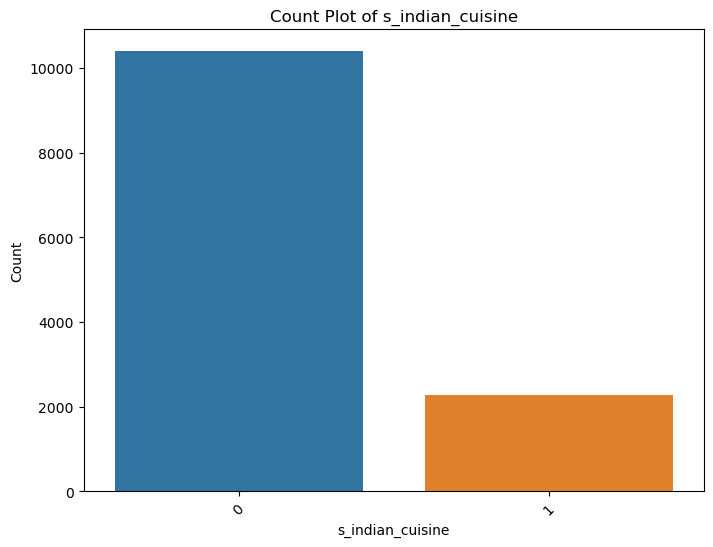

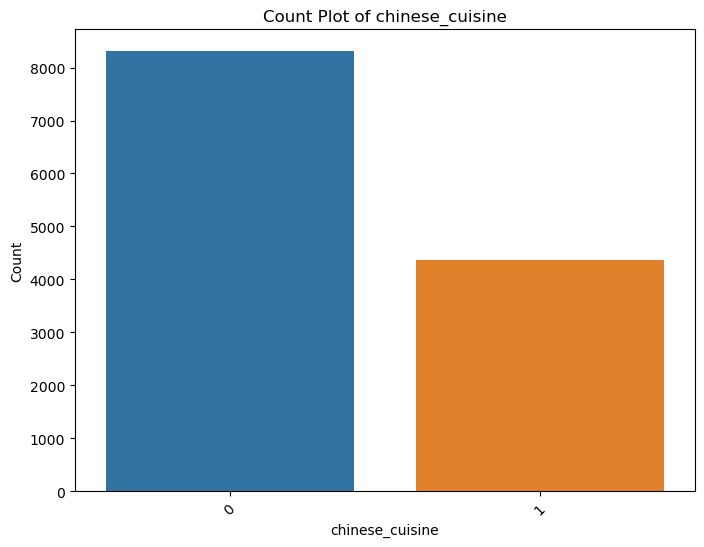

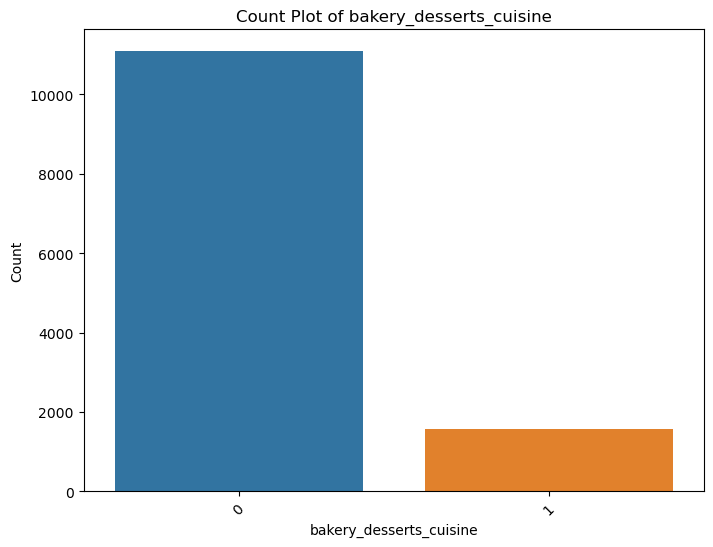

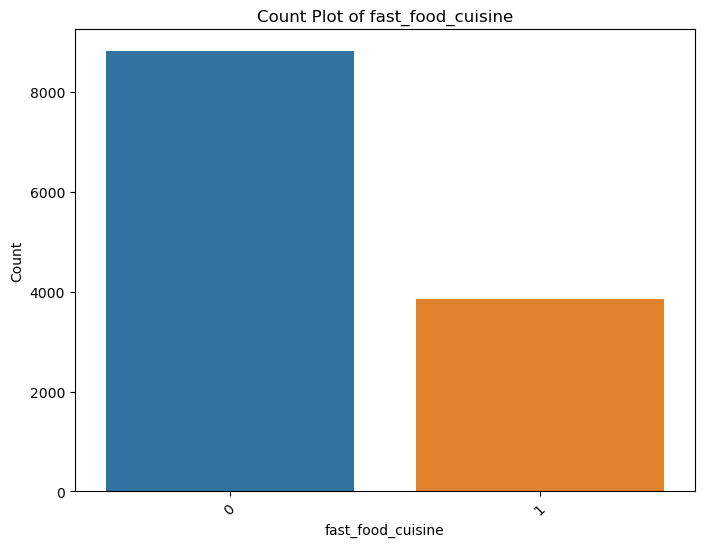

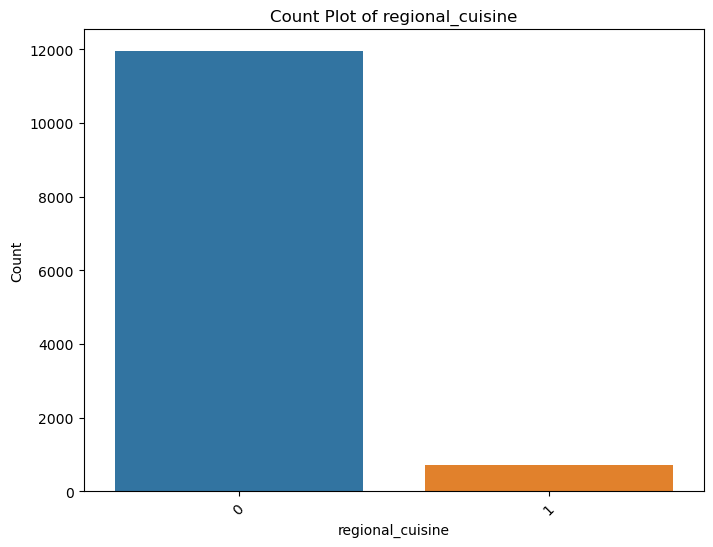

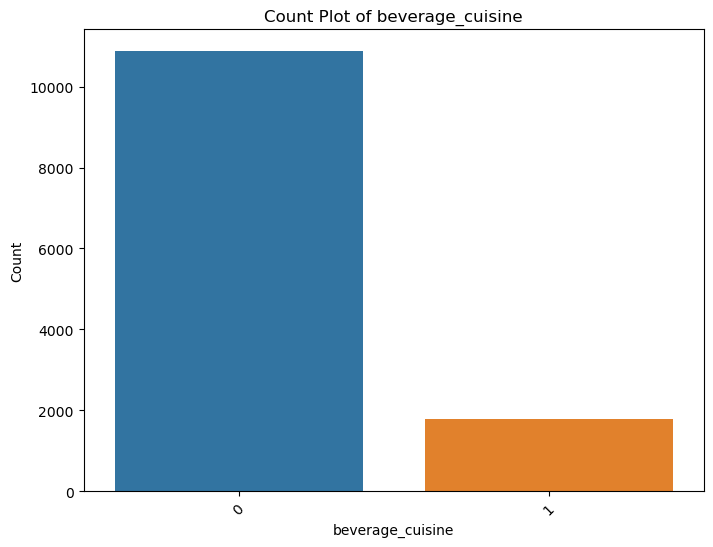

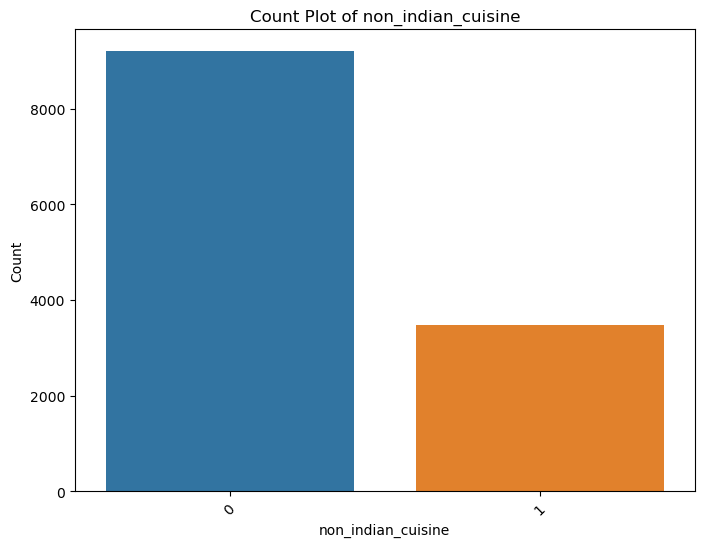

In [195]:
univariate_analysis()

# Bivariate Analysis

In [ ]:
def bivariate_analysis():
    # Scatter plot for numerical variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col1 in numerical_cols:
        for col2 in numerical_cols:
            if col1 != col2:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=df, x=col1, y=col2)
                plt.title(f'Scatter Plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()

    # Box plot for numerical vs categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x=cat_col, y=num_col)
            plt.title(f'Box Plot of {num_col} vs {cat_col}')
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45)
            plt.show()

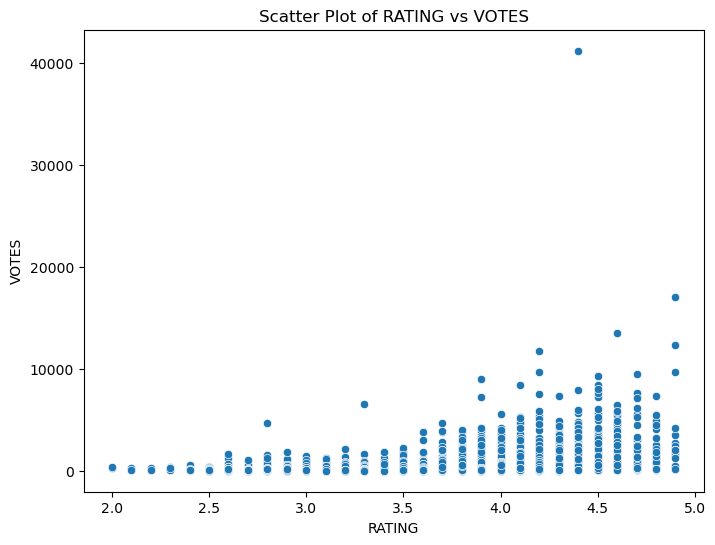

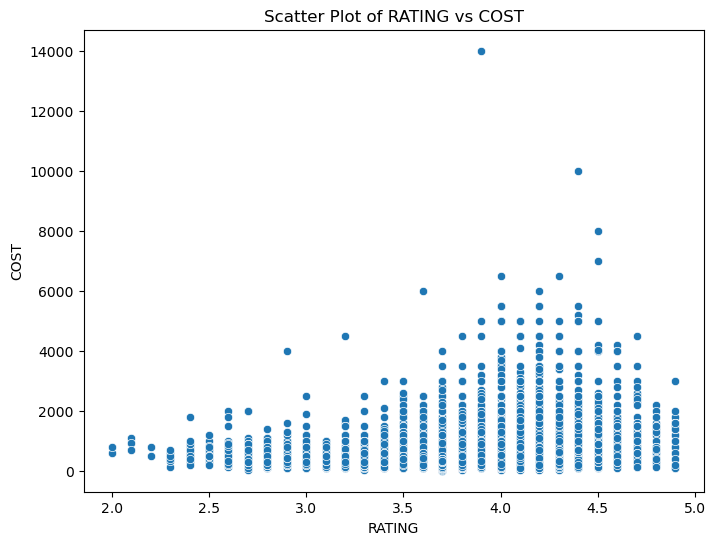

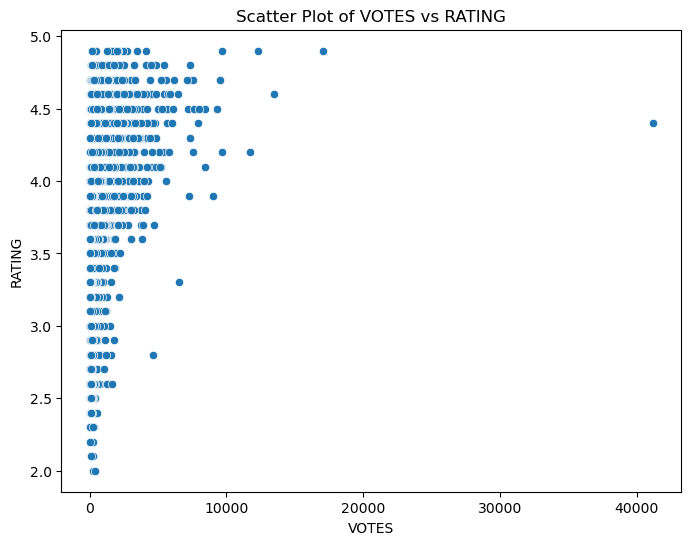

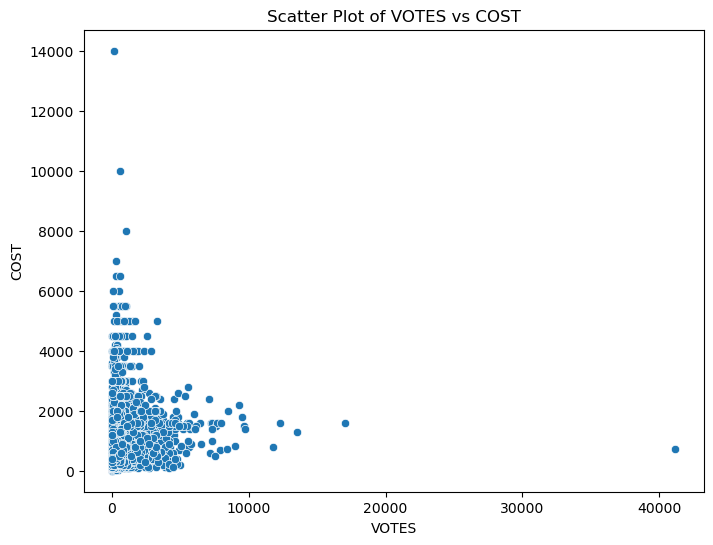

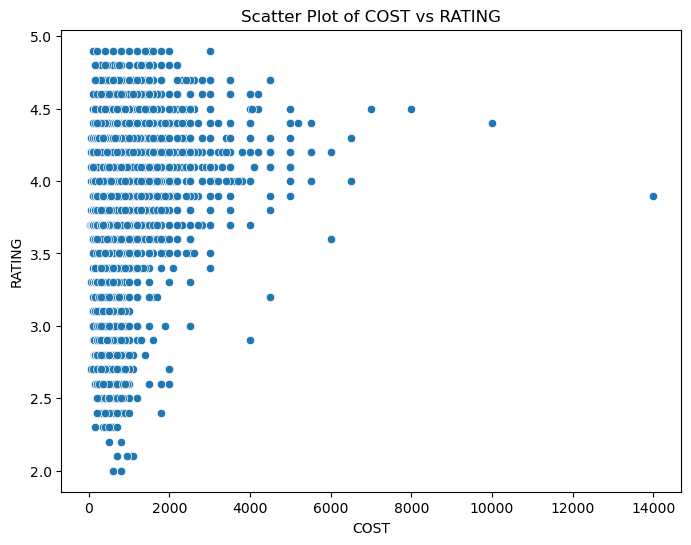

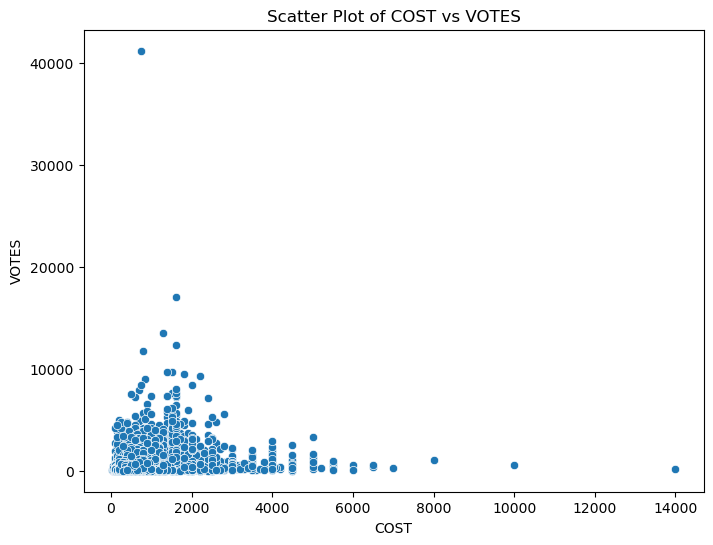

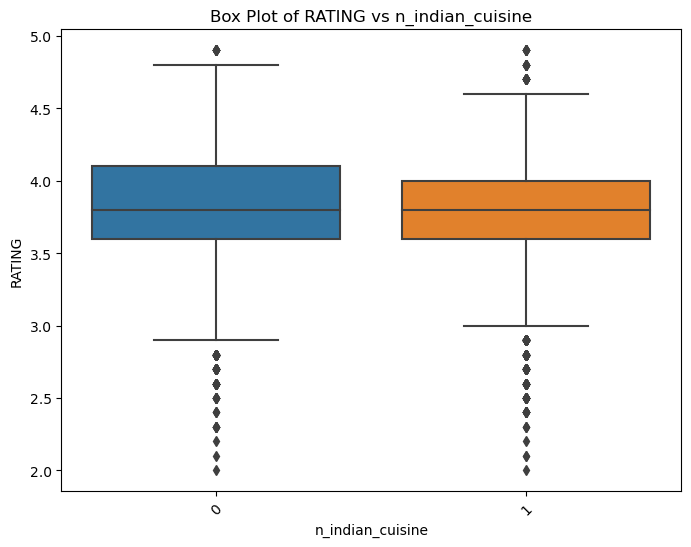

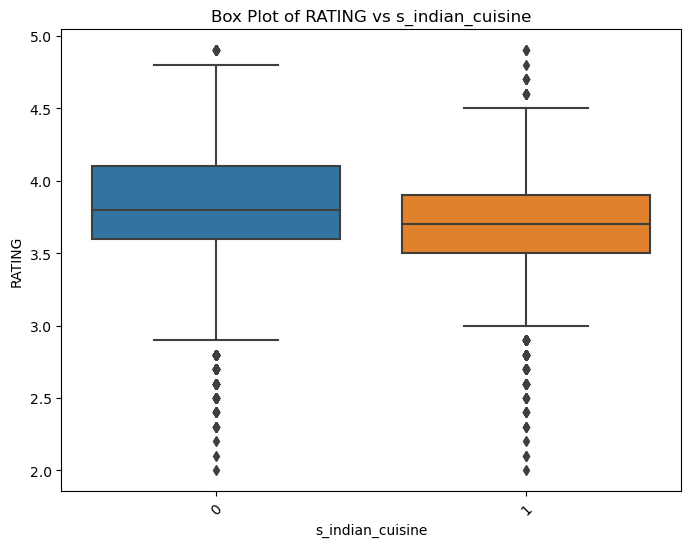

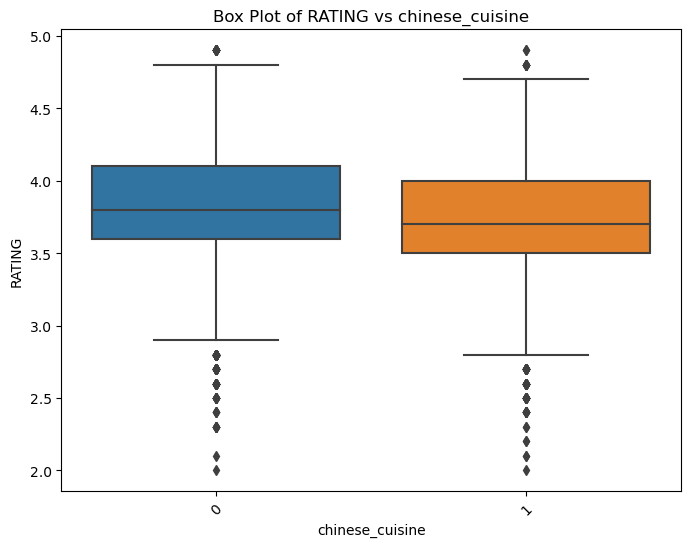

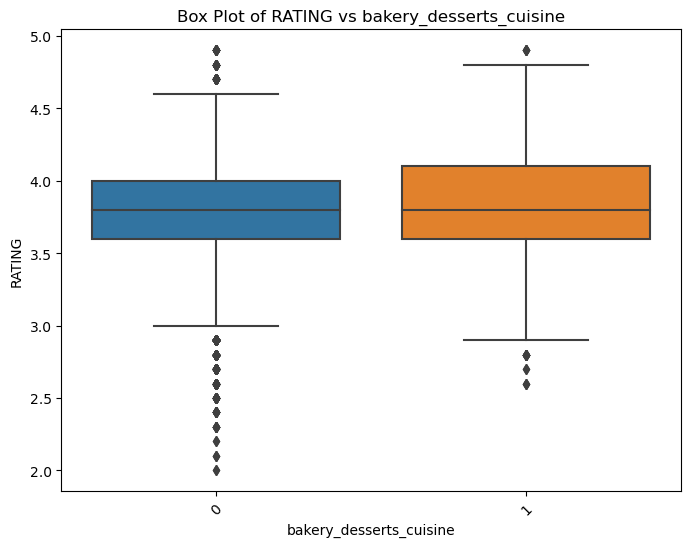

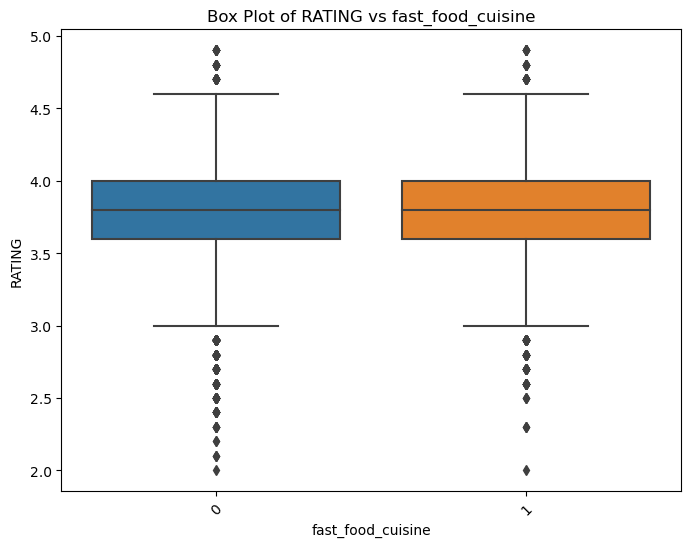

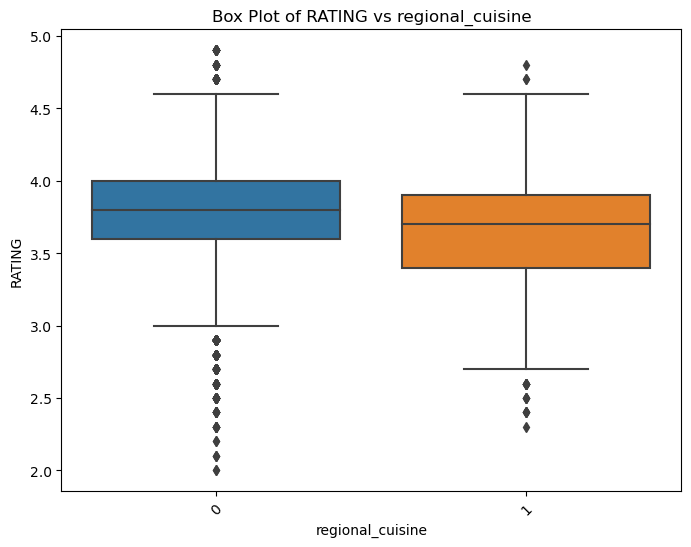

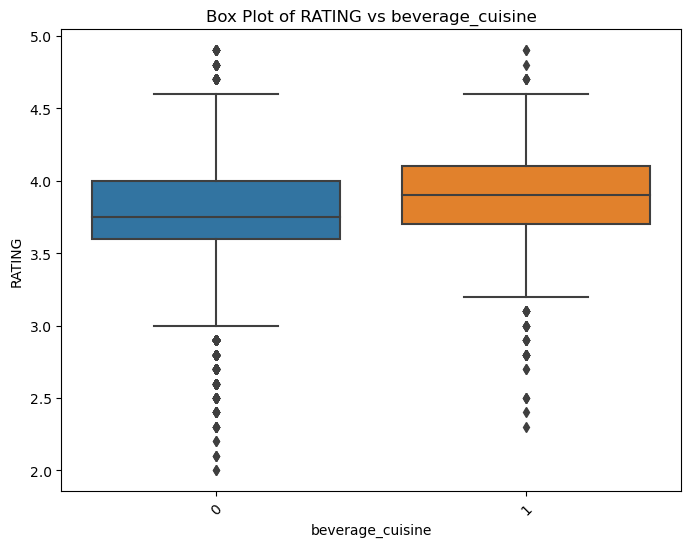

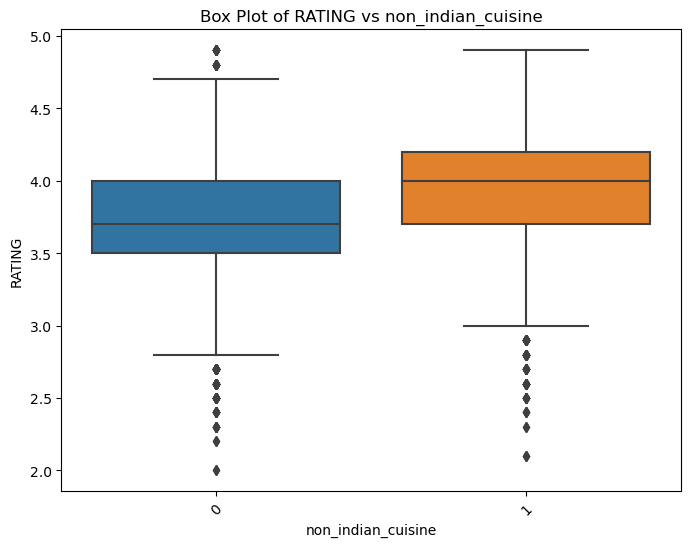

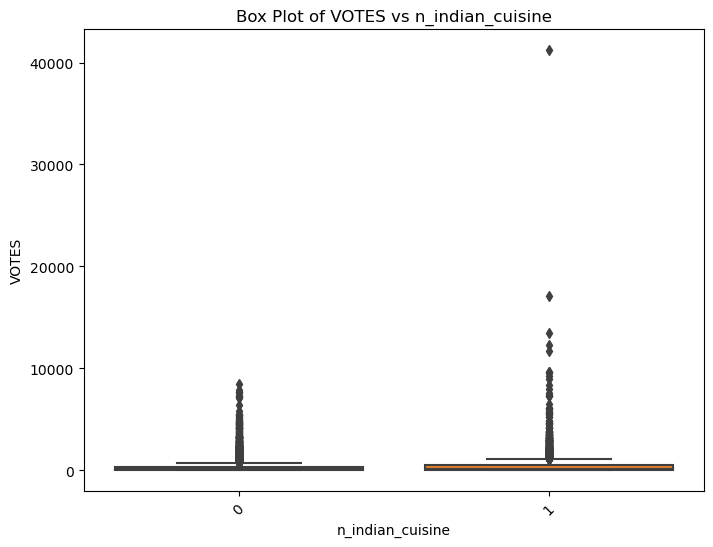

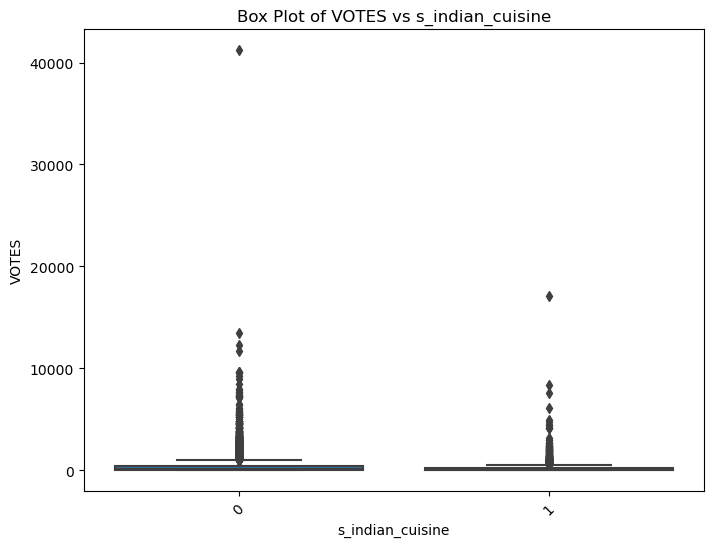

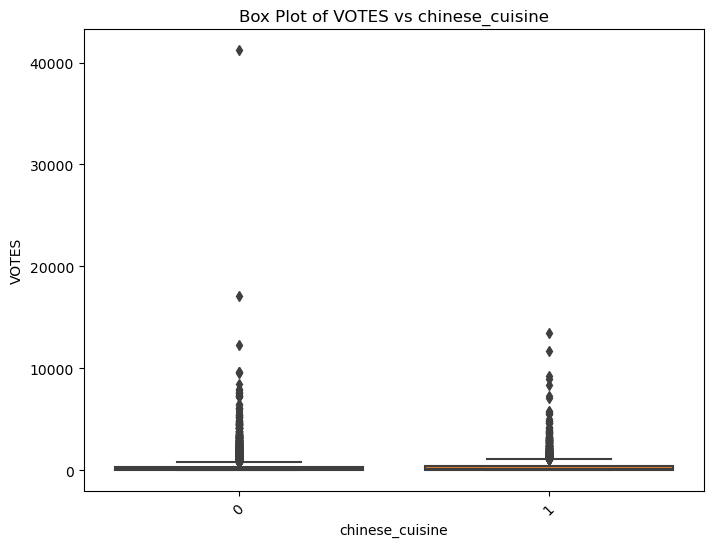

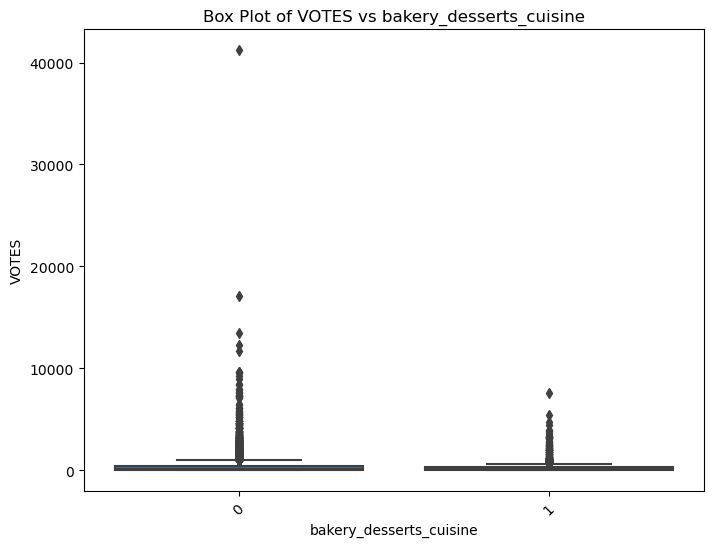

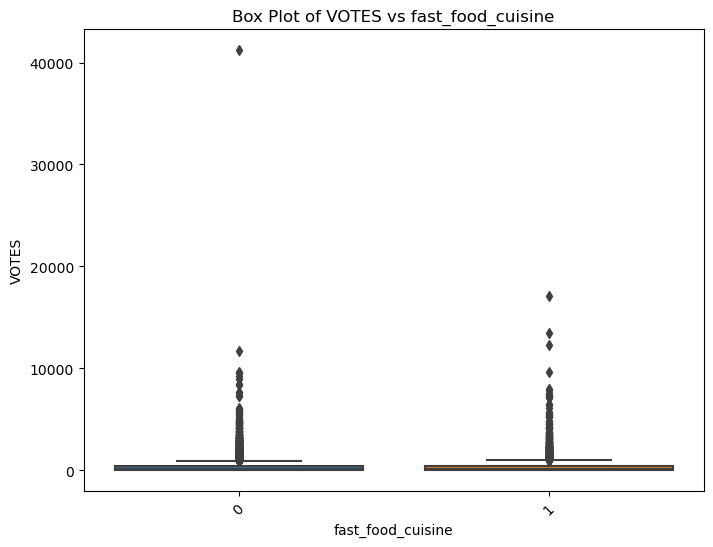

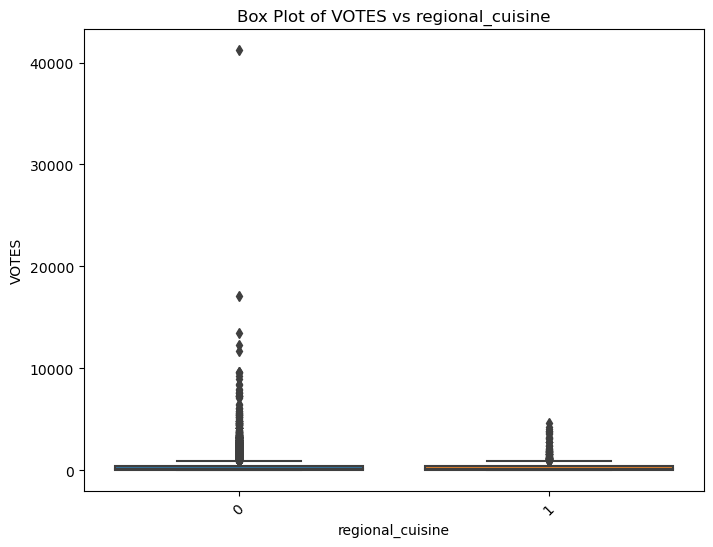

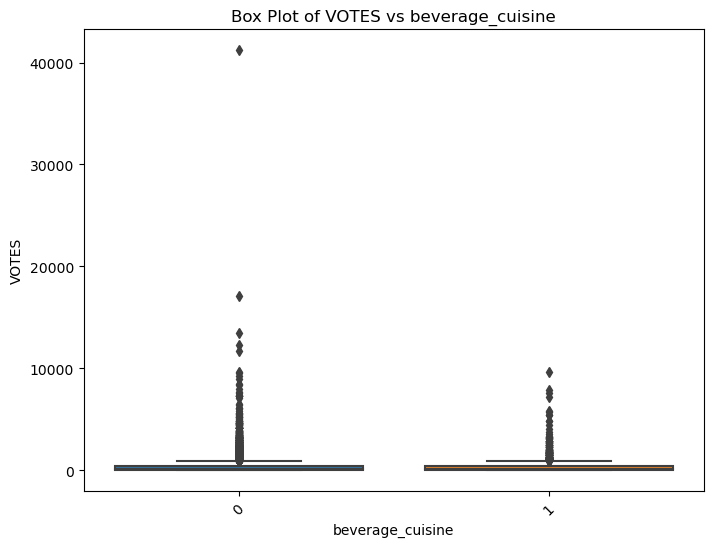

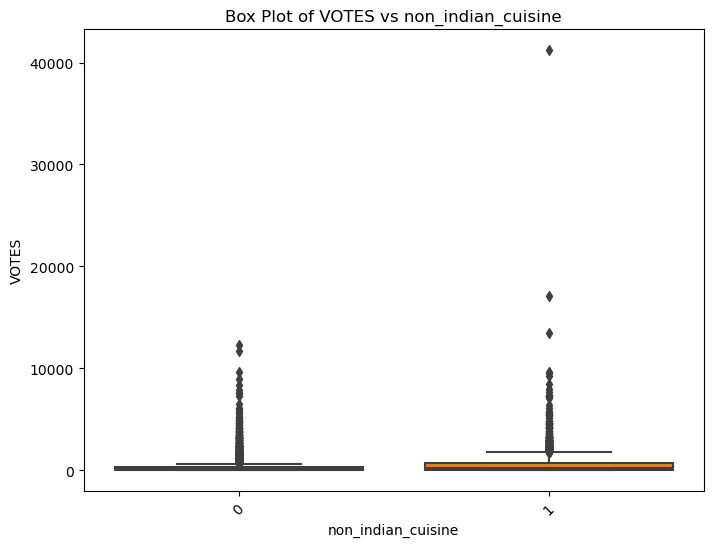

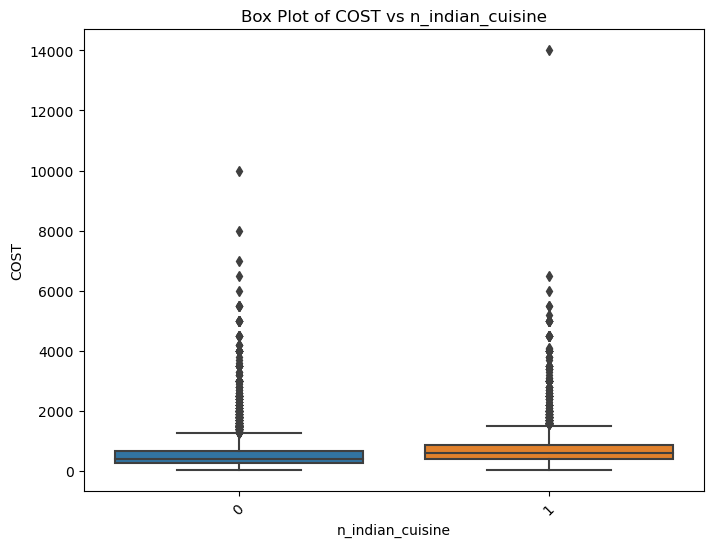

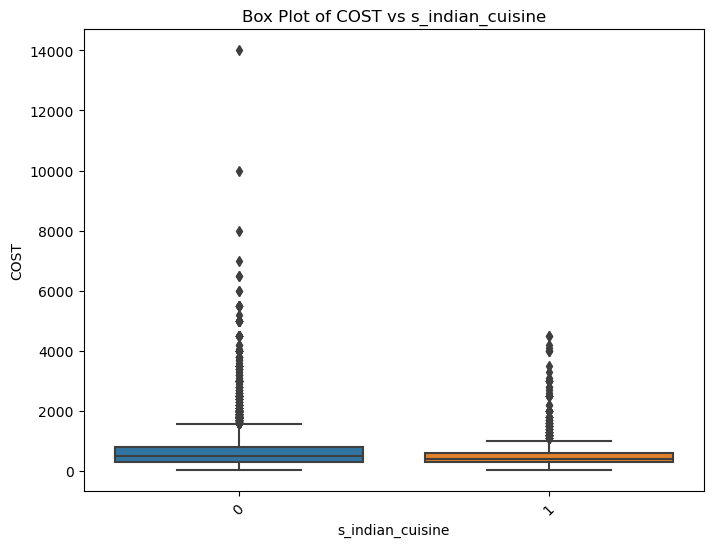

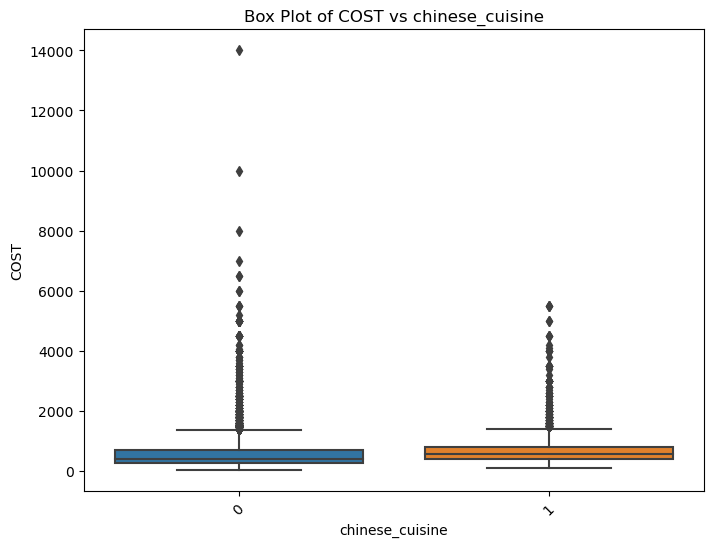

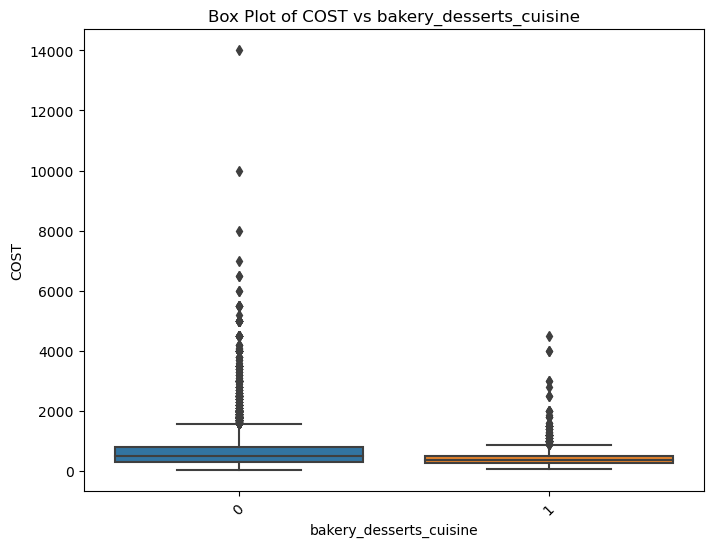

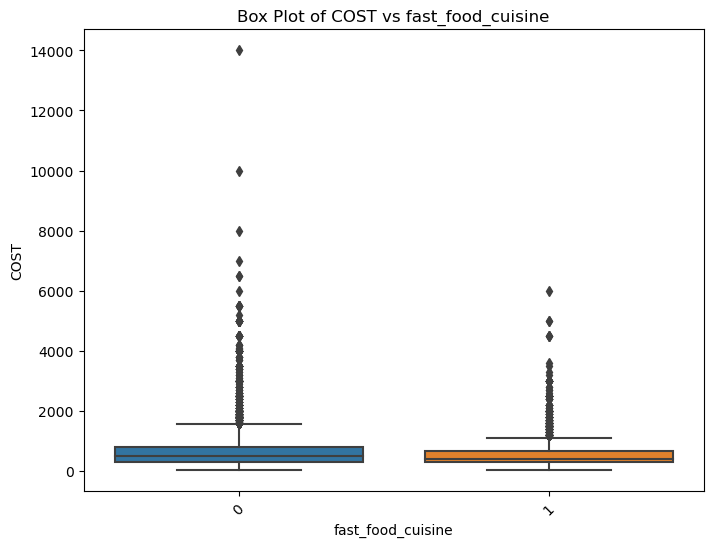

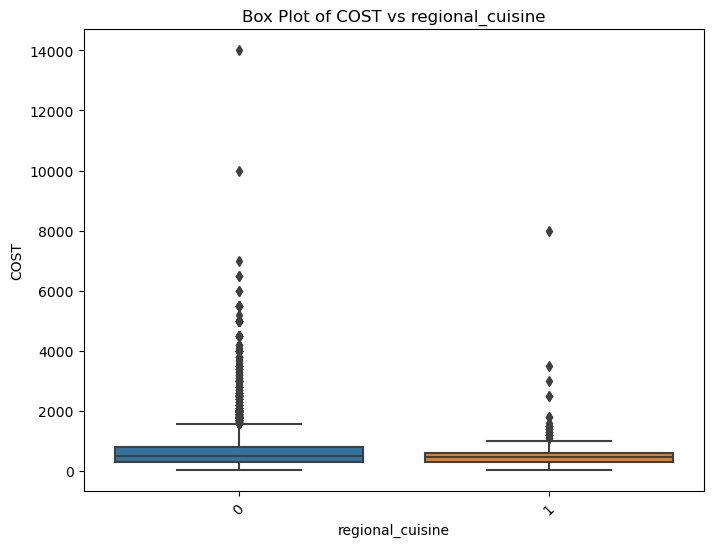

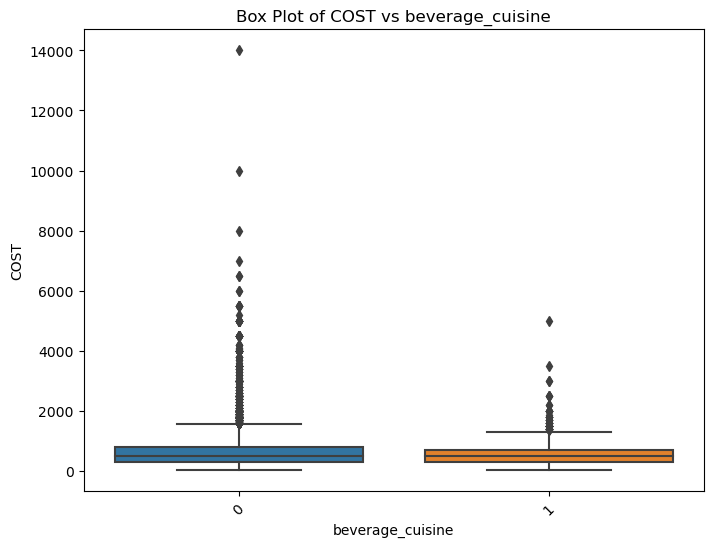

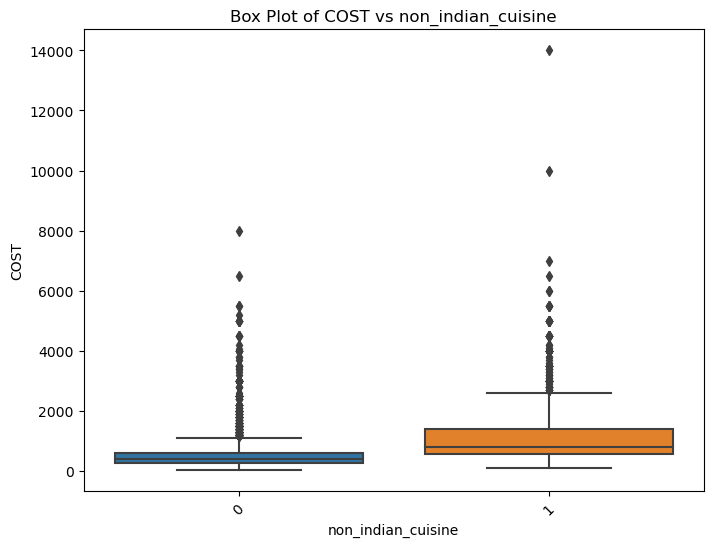

In [188]:
bivariate_analysis()

# Multivariate Analysis

In [190]:
def multivariate_analysis():
    # Pairplot for numerical variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    sns.pairplot(df[numerical_cols])
    plt.title('Pairplot of Numerical Variables')
    plt.show()

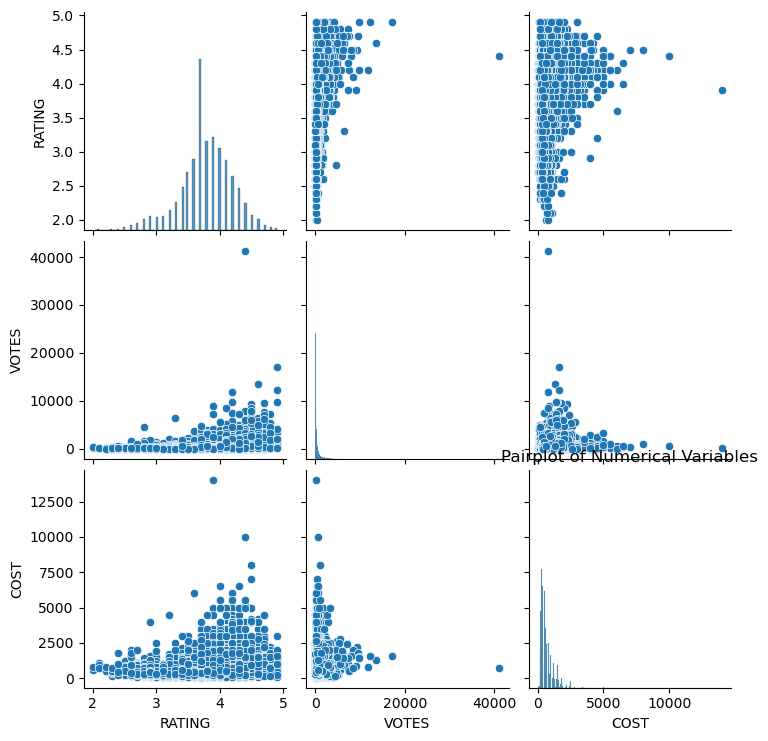

In [191]:
multivariate_analysis()

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

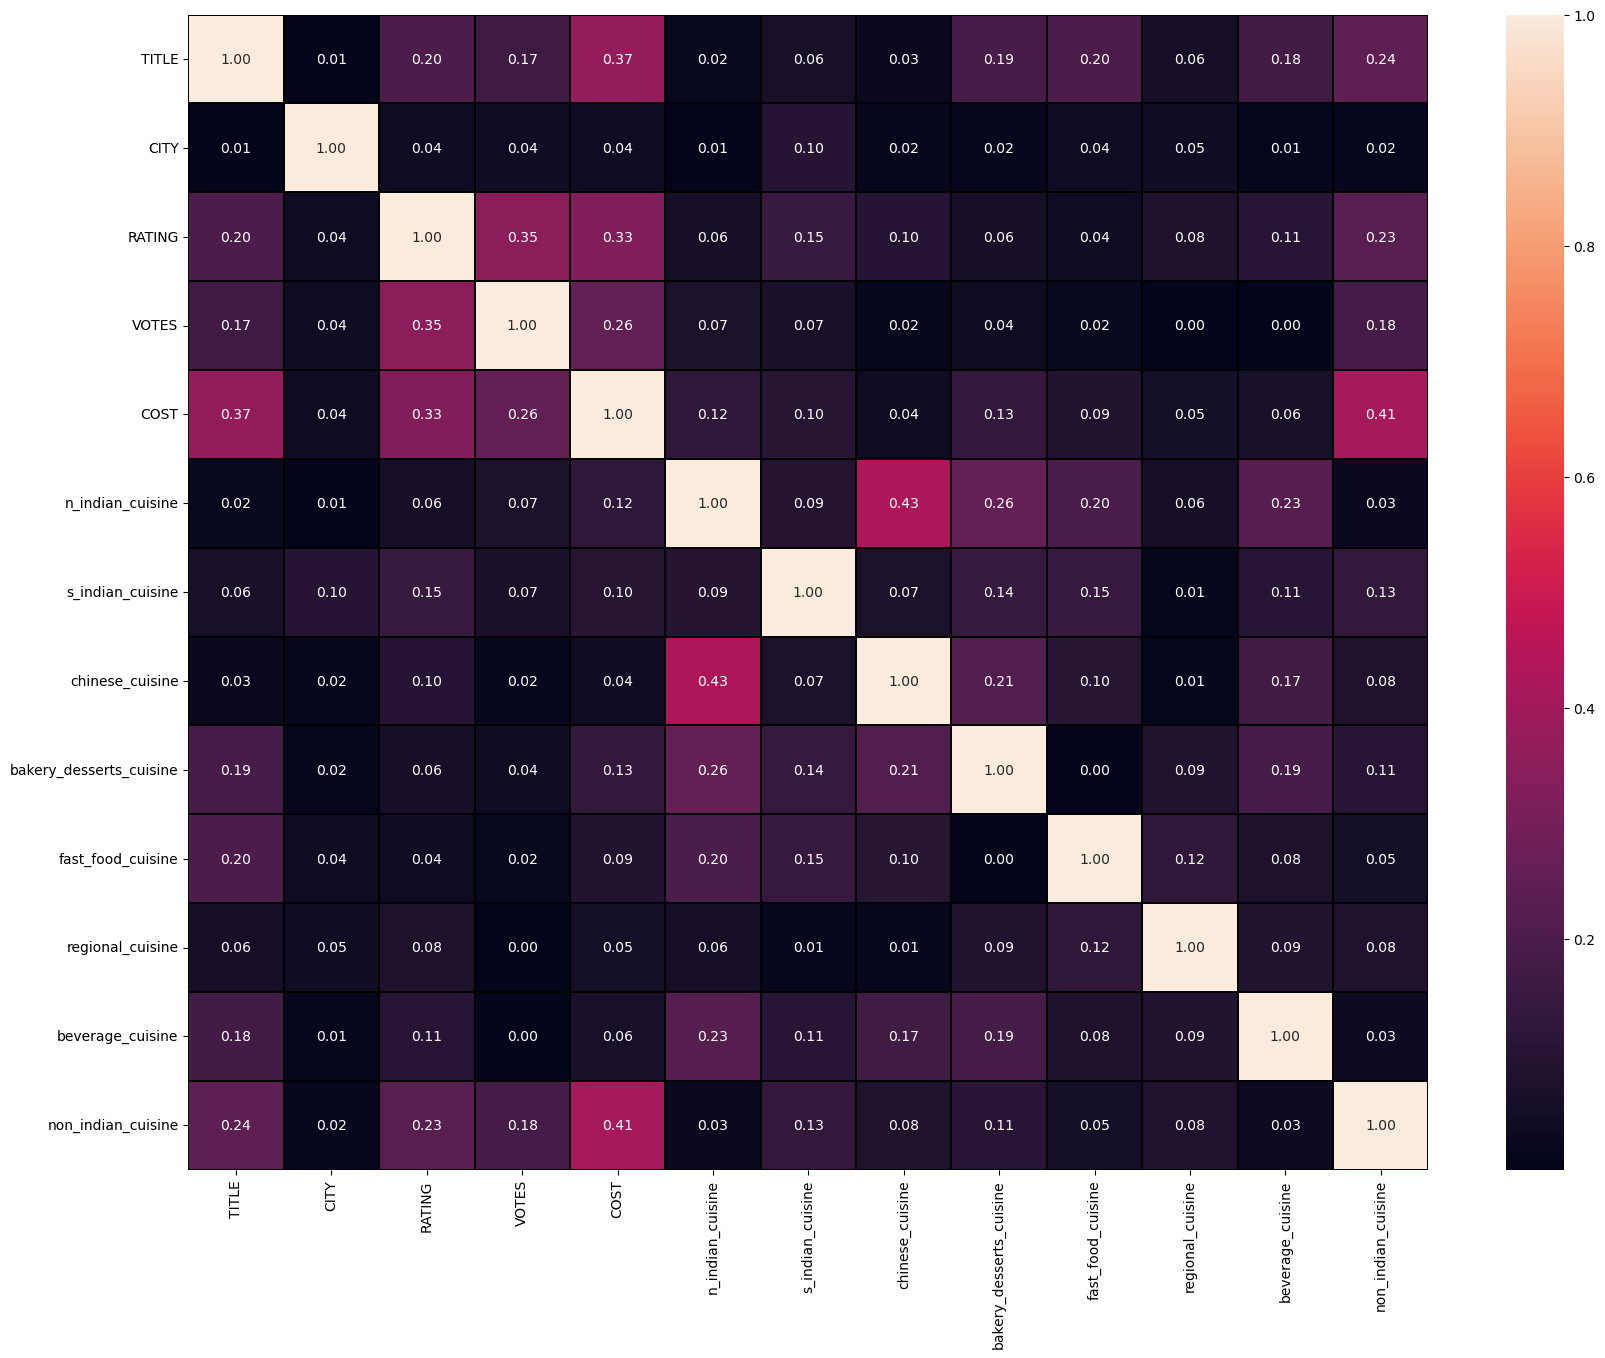

In [198]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2)
plt.show()

In [200]:
df.corr()['COST']

TITLE                     -0.373531
CITY                       0.036834
RATING                     0.327413
VOTES                      0.255770
COST                       1.000000
n_indian_cuisine           0.123848
s_indian_cuisine          -0.103228
chinese_cuisine            0.039288
bakery_desserts_cuisine   -0.134519
fast_food_cuisine         -0.092267
regional_cuisine          -0.051832
beverage_cuisine          -0.064731
non_indian_cuisine         0.411330
Name: COST, dtype: float64

In [ ]:
# Compute correlations
correlations = df.corr()['COST'].sort_values(ascending=False).drop(['COST'])

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Variable (subscribed)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Splitting the dataset into features and labels.**

In [202]:
x=df.drop(columns='COST',axis=1)
y=df.COST

# Distplot

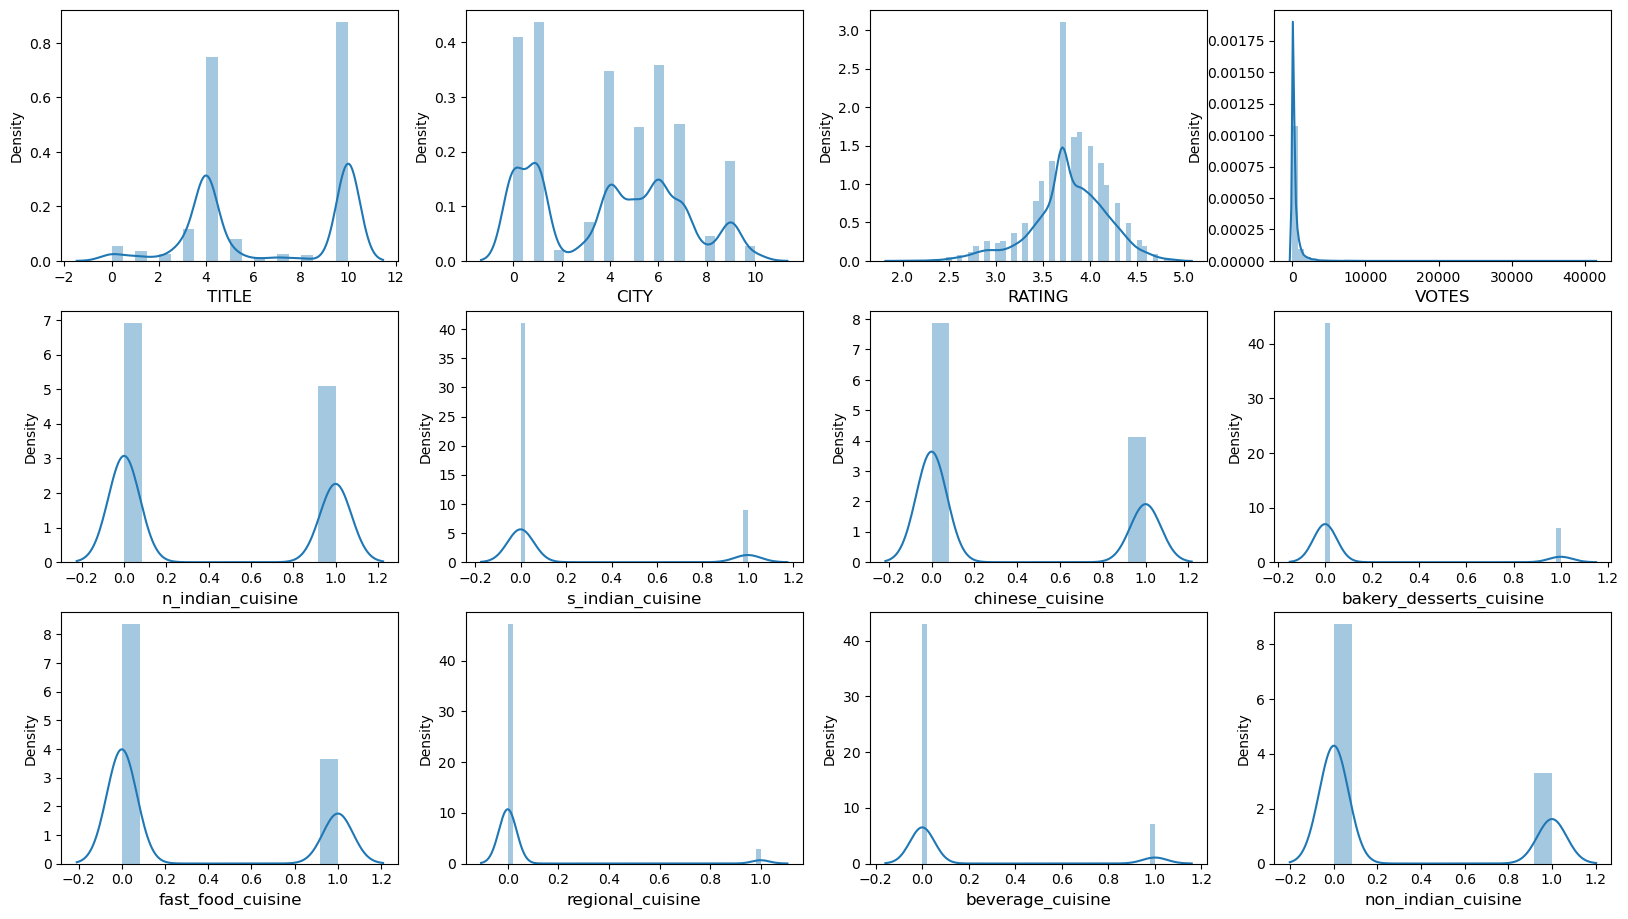

In [208]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

Since all features are categorical, there's no concern about data distribution or skewness. We can proceed without further adjustments.

# Boxplot

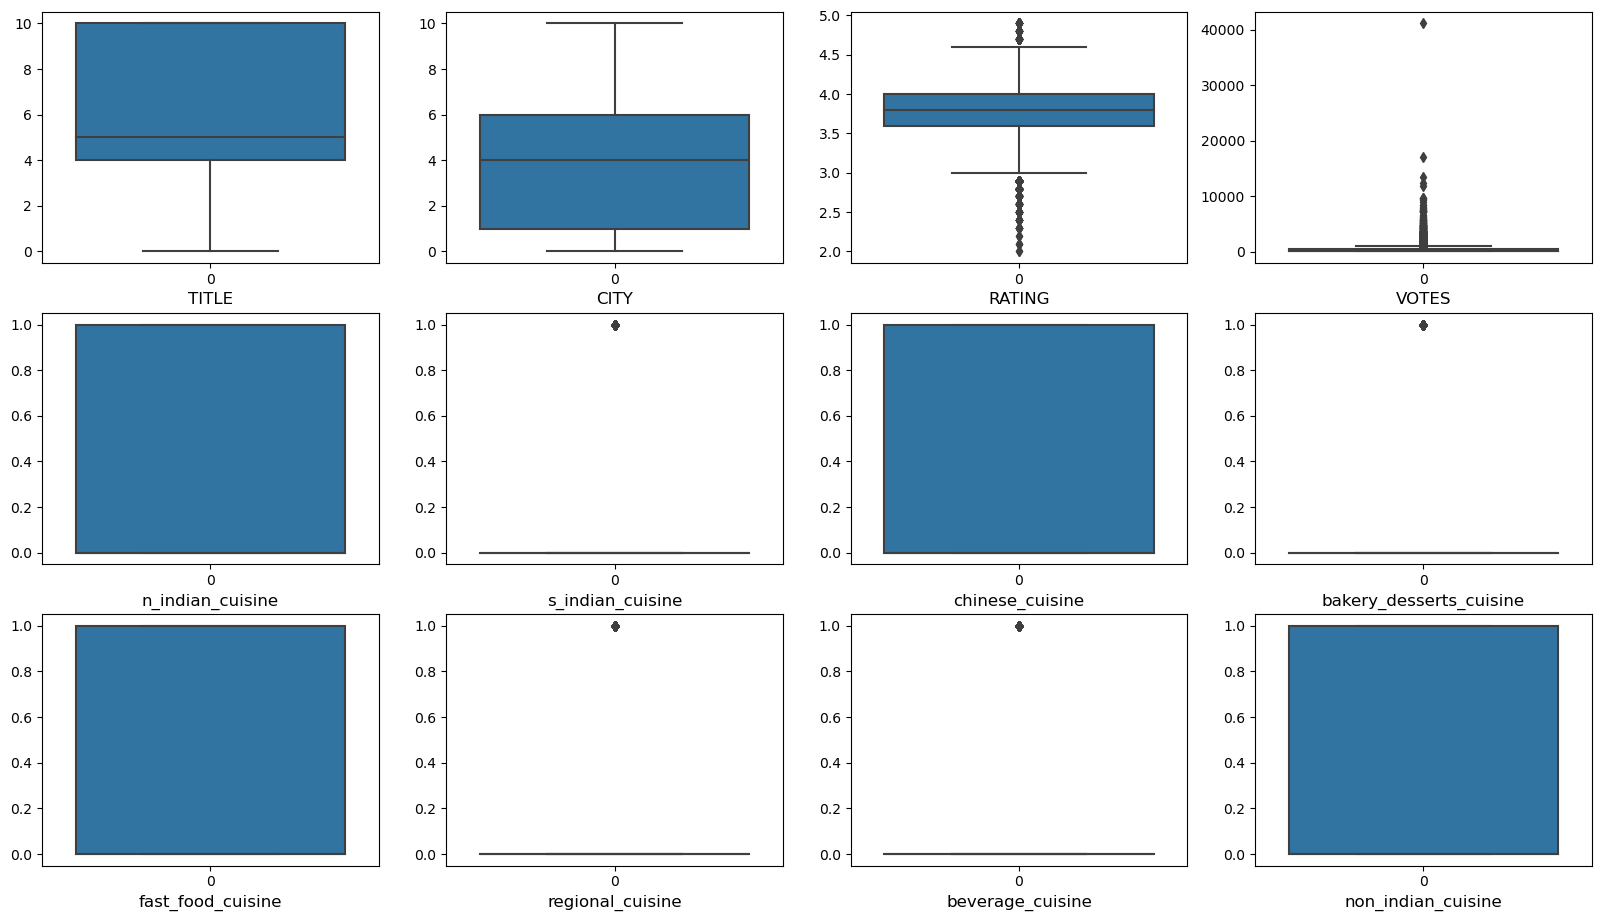

In [209]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

Since all features are categorical, outliers are not a concern. We can proceed without addressing outliers.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [210]:
X = df.drop('COST', axis=1)
Y = df['COST']

In [211]:
X

,TITLE,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,4,10,3.6,49.0,1,0,0,0,0,0,0,0
1,4,1,4.2,30.0,0,0,0,0,0,0,0,1
2,4,1,3.8,221.0,1,0,1,0,0,1,0,0
3,10,6,4.1,24.0,0,0,1,0,0,0,0,0
4,5,6,3.8,165.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12660,10,4,3.8,546.0,1,0,0,0,1,0,0,0
12661,4,6,4.3,1214.0,0,0,0,0,0,0,0,1
12662,8,6,4.0,608.0,0,0,1,0,1,0,0,1
12663,4,1,3.5,32.0,1,1,1,0,1,0,0,0


In [212]:
Y

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12660     500.0
12661    1800.0
12662    1300.0
12663     400.0
12664     600.0
Name: COST, Length: 12665, dtype: float64

# Feature Scaling

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,TITLE,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,-0.777243,2.043063,-0.440213,-0.409309,1.164970,-0.467556,-0.724685,-0.378084,-0.661368,-0.246235,-0.40663,-0.614190
1,-0.777243,-1.005365,1.050310,-0.432775,-0.858391,-0.467556,-0.724685,-0.378084,-0.661368,-0.246235,-0.40663,1.628161
2,-0.777243,-1.005365,0.056628,-0.196881,1.164970,-0.467556,1.379910,-0.378084,-0.661368,4.061169,-0.40663,-0.614190
3,1.072976,0.688206,0.801889,-0.440186,-0.858391,-0.467556,1.379910,-0.378084,-0.661368,-0.246235,-0.40663,-0.614190
4,-0.468873,0.688206,0.056628,-0.266044,-0.858391,-0.467556,-0.724685,2.644916,-0.661368,-0.246235,-0.40663,-0.614190
...,...,...,...,...,...,...,...,...,...,...,...,...
12660,1.072976,0.010778,0.056628,0.204510,1.164970,-0.467556,-0.724685,-0.378084,1.512017,-0.246235,-0.40663,-0.614190
12661,-0.777243,0.688206,1.298731,1.029522,-0.858391,-0.467556,-0.724685,-0.378084,-0.661368,-0.246235,-0.40663,1.628161
12662,0.456236,0.688206,0.553469,0.281083,-0.858391,-0.467556,1.379910,-0.378084,1.512017,-0.246235,-0.40663,1.628161
12663,-0.777243,-1.005365,-0.688634,-0.430305,1.164970,2.138781,1.379910,-0.378084,1.512017,-0.246235,-0.40663,-0.614190


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

In [215]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.39574987963594355 at random state 165


In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Model Building

In [228]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [229]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.38877238787596013
R-squared Score on training data: 33.67466830536217
Mean Absolute Error: 285.30413733784616
Mean Squared Error: 188916.43747886494
Root Mean Squared Error: 434.64518573068875

Cross Validation Score: [0.30194038 0.33393346 0.35563754 0.35365553 0.37461816]
Cross Validation Score Mean: 0.3439570111815199
R-squared Score - Cross Validation Score is 4.481537669444025


In [230]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.38877785180030255
R-squared Score on training data: 33.67466809106027
Mean Absolute Error: 285.2975126802732
Mean Squared Error: 188914.74870515618
Root Mean Squared Error: 434.64324302254624

Cross Validation Score: [0.30194035 0.33393361 0.35564083 0.35365504 0.37461701]
Cross Validation Score Mean: 0.34395736855943193
R-squared Score - Cross Validation Score is 4.482048324087062


In [231]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.38890334738459864
R-squared Score on training data: 33.6717467317888
Mean Absolute Error: 284.76750236214434
Mean Squared Error: 188875.96089807042
Root Mean Squared Error: 434.59862045118183

Cross Validation Score: [0.30190171 0.33396989 0.35639459 0.35335454 0.37430232]
Cross Validation Score Mean: 0.34398460838645895
R-squared Score - Cross Validation Score is 4.491873899813969


In [232]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: -0.10058909773102576
R-squared Score on training data: 99.4220618270868
Mean Absolute Error: 311.60753905917744
Mean Squared Error: 340166.8500362668
Root Mean Squared Error: 583.2382446618764

Cross Validation Score: [-0.055316   -0.01279114 -0.07307186  0.07740154 -0.0342535 ]
Cross Validation Score Mean: -0.0196061918111498
R-squared Score - Cross Validation Score is -8.098290591987595


In [233]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.5205673146745358
R-squared Score on training data: 91.30049364078404
Mean Absolute Error: 227.3888774400036
Mean Squared Error: 148181.64808992948
Root Mean Squared Error: 384.9436947008348

Cross Validation Score: [0.36342822 0.44110823 0.45302466 0.46976608 0.50375024]
Cross Validation Score Mean: 0.4462154872961852
R-squared Score - Cross Validation Score is 7.4351827378350555


In [234]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.36729705631560616
R-squared Score on training data: 99.41640356243444
Mean Absolute Error: 247.27781700422946
Mean Squared Error: 195553.96996526737
Root Mean Squared Error: 442.2148459349453

Cross Validation Score: [0.29489311 0.3136035  0.31988786 0.35475302 0.30617953]
Cross Validation Score Mean: 0.31786340288791076
R-squared Score - Cross Validation Score is 4.94336534276954


In [235]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: -0.7819123458082695
R-squared Score on training data: -32.98182785647539
Mean Absolute Error: 567.9576363801483
Mean Squared Error: 550748.241068322
Root Mean Squared Error: 742.1241412784805

Cross Validation Score: [-0.05316611 -0.98052998 -1.16721789 -0.87762317 -0.45288662]
Cross Validation Score Mean: -0.7062847539131178
R-squared Score - Cross Validation Score is -7.562759189515167


In [236]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.5565577258939503
R-squared Score on training data: 51.45804027393757
Mean Absolute Error: 227.63279362525077
Mean Squared Error: 137057.83735869674
Root Mean Squared Error: 370.2132322847155

Cross Validation Score: [0.4260506  0.48573547 0.54117235 0.50449679 0.53592602]
Cross Validation Score Mean: 0.49867624555633744
R-squared Score - Cross Validation Score is 5.788148033761281


In [237]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.4595558939051251
R-squared Score on training data: 78.84309027785008
Mean Absolute Error: 235.4088456718243
Mean Squared Error: 167038.8790602837
Root Mean Squared Error: 408.70390144979496

Cross Validation Score: [0.3583

# summary of the performance metrics for each model:

1. **Linear Regression:**
   - R-squared Score: 0.3888
   - Mean Absolute Error: 285.30
   - Mean Squared Error: 188916.44
   - Root Mean Squared Error: 434.65
   - Cross Validation Score Mean: 0.3440

2. **Ridge Regression:**
   - R-squared Score: 0.3888
   - Mean Absolute Error: 285.30
   - Mean Squared Error: 188914.75
   - Root Mean Squared Error: 434.64
   - Cross Validation Score Mean: 0.3440

3. **Lasso Regression:**
   - R-squared Score: 0.3889
   - Mean Absolute Error: 284.77
   - Mean Squared Error: 188875.96
   - Root Mean Squared Error: 434.60
   - Cross Validation Score Mean: 0.3440

4. **Decision Tree Regressor:**
   - R-squared Score: -0.1006
   - Mean Absolute Error: 311.61
   - Mean Squared Error: 340166.85
   - Root Mean Squared Error: 583.24
   - Cross Validation Score Mean: -0.0196

5. **Random Forest Regressor:**
   - R-squared Score: 0.5206
   - Mean Absolute Error: 227.39
   - Mean Squared Error: 148181.65
   - Root Mean Squared Error: 384.94
   - Cross Validation Score Mean: 0.4462

6. **Extra Trees Regressor:**
   - R-squared Score: 0.3673
   - Mean Absolute Error: 247.28
   - Mean Squared Error: 195553.97
   - Root Mean Squared Error: 442.21
   - Cross Validation Score Mean: 0.3179

7. **AdaBoost Regressor:**
   - R-squared Score: -0.7819
   - Mean Absolute Error: 567.96
   - Mean Squared Error: 550748.24
   - Root Mean Squared Error: 742.12
   - Cross Validation Score Mean: -0.7063

8. **Gradient Boosting Regressor:**
   - R-squared Score: 0.5566
   - Mean Absolute Error: 227.63
   - Mean Squared Error: 137057.84
   - Root Mean Squared Error: 370.21
   - Cross Validation Score Mean: 0.4987

9. **XGB Regressor:**
   - R-squared Score: 0.4596
   - Mean Absolute Error: 235.41
   - Mean Squared Error: 167038.88
   - Root Mean Squared Error: 408.70
   - Cross Validation Score Mean: 0.4475



Based on the R-squared score and the mean squared error, the Gradient Boosting Regressor appears to be the best model among the ones evaluated. It has the highest R-squared score and the lowest mean squared error, indicating better performance in explaining the variance in the data and making accurate predictions.

# Hyper parameter tuning on the best ML Model

In [238]:
# Choosing the Gradient Boosting Regressor as best model
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}
      

In [240]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=GBR, param_grid=param_grid, cv=5)

In [241]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [242]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [244]:
final_model_1 = GradientBoostingRegressor(learning_rate=0.2,max_depth=4, min_samples_split=10, n_estimators=50,random_state=maxrs)

In [245]:
final_model_1.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=10,
                          n_estimators=50, random_state=165)

In [246]:
pred = final_model_1.predict(X_test)

In [247]:
mse = mean_squared_error(Y_test, pred)

In [248]:
print("Mean Squared Error:", mse)

Mean Squared Error: 131137.07089922618


# Saving the model

In [249]:
import joblib

filename = "FinalModel_10.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_10.pkl']

In [250]:
model=joblib.load("FinalModel_10.pkl")

prediction=model.predict(X_test)
prediction

array([ 872.38455089,  746.77113244, 1214.99846573, ...,  379.17268196,
        997.6593479 ,  627.2881549 ])

In [252]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,872.384551,400.0
1,746.771132,1200.0
2,1214.998466,2600.0
3,1668.865756,800.0
4,279.336895,300.0
...,...,...
2528,964.596835,700.0
2529,286.734386,500.0
2530,379.172682,400.0
2531,997.659348,1000.0


In [253]:
df.tail()

,Predicted,Original
2528,964.596835,700.0
2529,286.734386,500.0
2530,379.172682,400.0
2531,997.659348,1000.0
2532,627.288155,700.0


# Applying the model to the test data to generate predictions.

In [ ]:
"C:\Users\JAVED\Saved Games\Data_Test.xlsx"

In [257]:
df= pd.read_excel(r"C:\Users\JAVED\Saved Games\Data_Test.xlsx")

In [259]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [260]:
df.head()#first 5 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [261]:
df[270:280]#middle 10 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
270,CASUAL DINING,9009,"Italian, Pizza",10:30am – 10:30pm (Mon-Sun),Ghaziabad,Surya Nagar,4.5,98 votes
271,CASUAL DINING,11688,"Healthy Food, Salad, Mediterranean",11am – 11pm (Mon-Sun),Bangalore,Indiranagar,4.8,285 votes
272,QUICK BITES,8406,South Indian,"Closed (Mon),6:30am – 9pm (Tue-Sun)",Mumbai,Matunga East,4.0,785 votes
273,CASUAL DINING,2034,"Italian, Chinese, American","11am – 1am (Mon-Tue),11am – 11pm (Wed-Sun)",Mumbai,Dombivali East,3.7,151 votes
274,FOOD COURT,8813,North Indian,12noon – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,2.6,338 votes
275,BAR,8690,"Italian, Chinese, Finger Food",5pm – 10pm (Mon-Sun),Kochi,Ernakulam,2.8,24 votes
276,CASUAL DINING,4218,"Pizza, Fast Food","12midnight – 3am, 11am – 12midnight...",Hyderabad,Kondapur,3.1,591 votes
277,SWEET SHOP,5039,"Mithai, Street Food",10am – 10pm (Mon-Sun),Hyderabad,Kothaguda,3.8,70 votes
278,CASUAL DINING,5313,"North Indian, Biryani, Chinese, Mughlai",5am – 11pm (Mon-Sun),Hyderabad,Abids,3.6,92 votes
279,BAR,14295,Finger Food,11am – 11pm (Mon-Sun),Kochi,Kakkanad,-,NaN


In [262]:
df.tail()#last 5 rows

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [263]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

# Exploratory Data Analysis (EDA)¶

In [264]:
df.shape

(4231, 8)

In [265]:
df.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [267]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,3947,4231,4231,4196,4201,4229,3829
unique,85,1727,1183,151,834,31,1136
top,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),Bangalore,Kakkanad,3.8,6 votes
freq,1416,213,447,686,54,414,30


In [268]:
df.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [269]:
df.duplicated().sum()

1

In [270]:
df.drop_duplicates(inplace=True)

In [271]:
df.duplicated().sum()

0

In [272]:
df.reset_index(inplace=True)

In [273]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
index,4230
TITLE,85
RESTAURANT_ID,4127
CUISINES,1727
TIME,1183
CITY,151
LOCALITY,834
RATING,31
VOTES,1136


In [274]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

index
0       1
2825    1
2811    1
2812    1
2813    1
       ..
1415    1
1416    1
1417    1
1418    1
4230    1
Name: count, Length: 4230, dtype: int64
/n
TITLE
QUICK BITES                   1416
CASUAL DINING                 1257
CAFÉ                           223
DESSERT PARLOR                 126
CASUAL DINING,BAR              114
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: count, Length: 85, dtype: int64
/n
RESTAURANT_ID
11169    3
10391    3
12799    3
7656     3
1482     3
        ..
636      1
7425     1
3631     1
8970     1
2421     1
Name: count, Length: 4127, dtype: int64
/n
CUISINES
North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                       

In [275]:
nul_val=df.isnull()

In [276]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

index
index
False    4230
Name: count, dtype: int64

TITLE
TITLE
False    3946
True      284
Name: count, dtype: int64

RESTAURANT_ID
RESTAURANT_ID
False    4230
Name: count, dtype: int64

CUISINES
CUISINES
False    4230
Name: count, dtype: int64

TIME
TIME
False    4230
Name: count, dtype: int64

CITY
CITY
False    4195
True       35
Name: count, dtype: int64

LOCALITY
LOCALITY
False    4200
True       30
Name: count, dtype: int64

RATING
RATING
False    4228
True        2
Name: count, dtype: int64

VOTES
VOTES
False    3828
True      402
Name: count, dtype: int64



In [277]:
#Checking null values-
df.isnull().sum()

index              0
TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [278]:
df.isnull().sum().sum()

753

<Axes: >

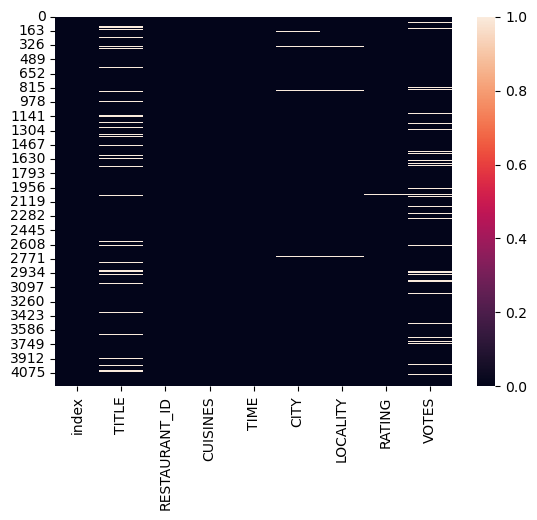

In [279]:
sns.heatmap(df.isnull())

In [280]:
# Removing nan values from the dataset-
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [281]:
df.isnull().sum().sum()

0

<Axes: >

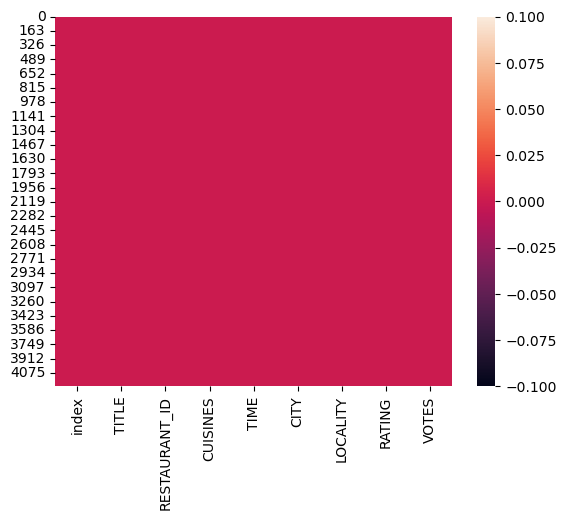

In [282]:
sns.heatmap(df.isnull())

In [283]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)  
df['RATING'].fillna(3.8, inplace=True)  
df['VOTES'].fillna(0.0, inplace=True) 

In [285]:
df

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,3,QUICK BITES,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...,...
4225,4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4226,4227,QUICK BITES,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4227,4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4228,4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


In [286]:
df.isnull().sum()

index            0
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [287]:
df.isna().sum()

index            0
TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

# TITLE:

In [288]:
df.TITLE.unique()

array(['CASUAL DINING', 'QUICK BITES', 'FOOD TRUCK,DESSERT PARLOR',
       'DESSERT PARLOR,QUICK BITES', 'CASUAL DINING,BAR', 'LOUNGE',
       'BEVERAGE SHOP', 'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB',
       'CAFÉ', 'BAKERY', 'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING',
       'BAKERY,CASUAL DINING', 'BAR', 'FOOD COURT',
       'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,CAFÉ', 'MESS', 'BAR,CASUAL DINING',
       'BEVERAGE SHOP,CAFÉ', 'BEVERAGE SHOP,DESSERT PARLOR',
       'PUB,FINE DINING', 'CASUAL DINING,FOOD COURT',
       'CAFÉ,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       'CASUAL DINING,

In [289]:
# Binning CASUAL DINING
dining_title = df[df.TITLE.str.contains('DINING')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=dining_title, value='CASUAL DINING', inplace=True)

# Binning CAFE
cafe_title = df[df.TITLE.str.contains('CAF')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=cafe_title, value='CAFE', inplace=True)

# Binning QUICK BITES
quick_bites_title = df[df.TITLE.str.contains('BITES')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=quick_bites_title, value='QUICK BITES', inplace=True)

# Binning DESSERT PARLOUR
dessert_title = df[df.TITLE.str.contains('DESSERT')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=dessert_title, value='DESSERT PARLOUR', inplace=True)

# Binning BEVERAGE SHOP
bev_title = df[df.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index
# mapper
df.TITLE.replace(to_replace=bev_title, value='BEVERAGE SHOP', inplace=True)


In [290]:
# Binning BAR and PUB
bar_titles = df[df['TITLE'].str.contains('BAR|PUB', case=False)].index
df.loc[bar_titles, 'TITLE'] = 'BAR_PUB'

# Binning BAKERY, CONFECTIONARY, and SWEET SHOP
bakery_titles = df[df['TITLE'].str.contains('BAKERY|CONFECTIONERY|SWEET SHOP', case=False)].index
df.loc[bakery_titles, 'TITLE'] = 'BAKERY_SWEETS'

# Binning MICROBREWERY, LOUNGE, and CLUBS
lounge_titles = df[df['TITLE'].str.contains('MICROBREWERY|LOUNGE|CLUB', case=False)].index
df.loc[lounge_titles, 'TITLE'] = 'LOUNGE_CLUB_MICROBREWERY'

# Binning FOOD COURT, FOOD TRUCK, and KIOSK
food_court_titles = df[df['TITLE'].str.contains('FOOD COURT|FOOD TRUCK|KIOSK', case=False)].index
df.loc[food_court_titles, 'TITLE'] = 'FOOD_COURT_TRUCK'

# Binning DHABA and MESS
dhaba_titles = df[df['TITLE'].str.contains('MESS|DHABA|BHOJANALYA', case=False)].index
df.loc[dhaba_titles, 'TITLE'] = 'DHABA_MESS'

# Binning PAAN and MEAT SHOP
paan_titles = df[df['TITLE'].str.contains('PAAN', case=False)].index
df.loc[paan_titles, 'TITLE'] = 'FOOD_COURT_TRUCK'


In [291]:
df.TITLE.replace('None',np.nan,inplace=True)

In [292]:
df.TITLE.unique()

array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOUR',
       'LOUNGE_CLUB_MICROBREWERY', 'BEVERAGE SHOP', 'BAR_PUB', 'CAFE',
       'BAKERY_SWEETS', 'DHABA_MESS', 'FOOD_COURT_TRUCK'], dtype=object)

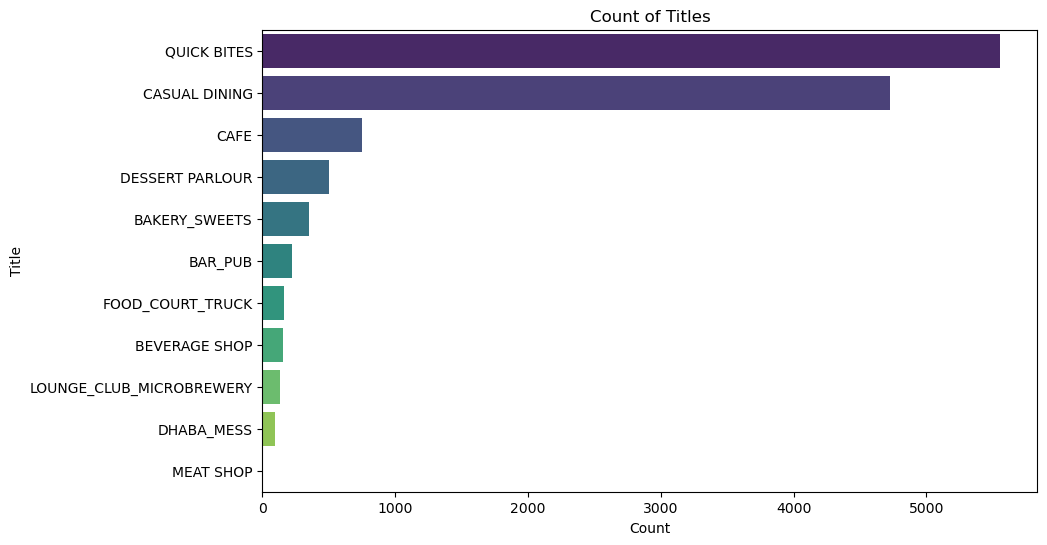

In [293]:
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Count of Titles')
plt.show()

# CUISINE

In [294]:
df.CUISINES.unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food',
       'Rolls, Beverages'], dtype=object)

In [295]:
# North Indian Cuisine
df['n_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('North Indian'), 1)
df['n_indian_cuisine'] = df['n_indian_cuisine'].mask(~df['CUISINES'].str.contains('North Indian'), 0)

# South Indian Cuisine
df['s_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('South Indian'), 1)
df['s_indian_cuisine'] = df['s_indian_cuisine'].mask(~df['CUISINES'].str.contains('South Indian'), 0)

# Chinese Cuisine
df['chinese_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Chinese'), 1)
df['chinese_cuisine'] = df['chinese_cuisine'].mask(~df['CUISINES'].str.contains('Chinese'), 0)

# Bakery and Desserts Cuisine
df['bakery_desserts_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Desserts|Ice Cream|Bakery'), 1)
df['bakery_desserts_cuisine'] = df['bakery_desserts_cuisine'].mask(~df['CUISINES'].str.contains('Desserts|Ice Cream|Bakery'), 0)

# Fast Food Cuisine
df['fast_food_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'), 1)
df['fast_food_cuisine'] = df['fast_food_cuisine'].mask(~df['CUISINES'].str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'), 0)

# Regional Cuisine
indian_states = 'your_list_of_indian_states_here'  # Replace with your list of Indian states
df['regional_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)), 1)
df['regional_cuisine'] = df['regional_cuisine'].mask(~df['CUISINES'].str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)), 0)

# Beverage Cuisine
df['beverage_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('Beverage|Cafe|Juices'), 1)
df['beverage_cuisine'] = df['beverage_cuisine'].mask(~df['CUISINES'].str.contains('Beverage|Cafe|Juices'), 0)

# Non-Indian Cuisine
df['non_indian_cuisine'] = df['CUISINES'].mask(df['CUISINES'].str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'), 1)
df['non_indian_cuisine'] = df['non_indian_cuisine'].mask(~df['CUISINES'].str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'), 0)


In [296]:
df.CUISINES.replace('None',np.nan,inplace=True)

In [297]:
df.CUISINES.unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food',
       'Rolls, Beverages'], dtype=object)

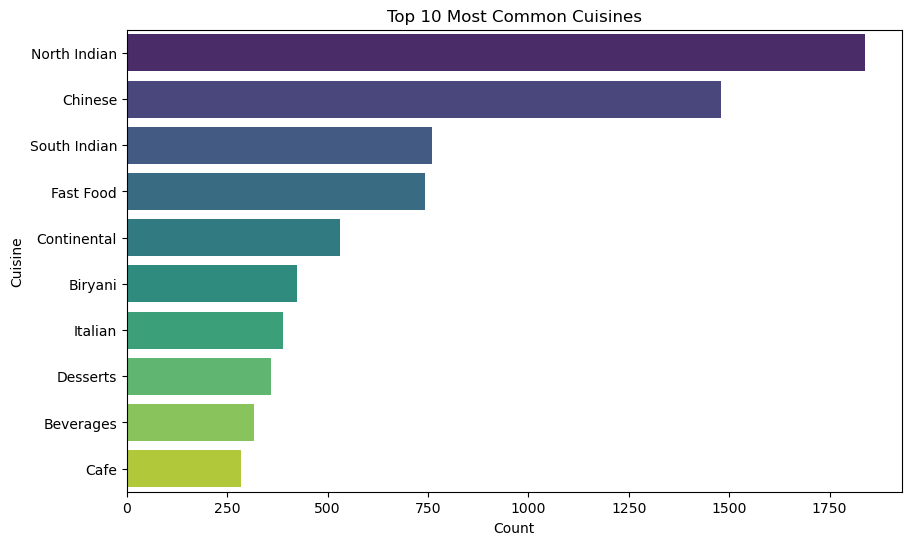

In [298]:
# Count the occurrences of each cuisine
cuisine_counts = df['CUISINES'].str.split(', ', expand=True).stack().value_counts()

# Select the top N most common cuisines
top_n_cuisines = cuisine_counts.head(10)

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_cuisines.values, y=top_n_cuisines.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines')
plt.show()


# CITY:
- Regarding the CITY variable, we will undertake similar steps as we did for the TITLE variable.

In [299]:
df.CITY.unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad',
       'Navi Mumbai', 'Chennai', 'New Delhi', 'Bangalore', 'Vasai Mumbai',
       'Gurgaon', 'Palarivattom', 'Delhi', 'Ernakulam', 'Thane West',
       'Ghaziabad', 'Chennai.', 'Thane', 'Telangana', 'Bandra West',
       'Potheri', 'Panathur Main Road', 'Secunderabad', 'JP Nagar',
       'Near Andheri West Station',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'Bengaluru', 'APR Chambers', 'Tamil Nadu 600102', 'Andheri West',
       'India', 'Serilingampally', 'Maharashtra.', 'Gandhinagar Rd',
       'Near Andheri East Station', 'HSR Layout', 'Greater Noida',
       'Uttar Pradesh', 'Dwarka', 'Velachery', 'Anna Nagar West',
       'Indiranagar', 'Whitefield', 'Kochi Ravipuram', 'Kerala 682036',
       'Madhapur', 'Hyderabad.', 'Mira Road Thane Mumbai',
       'India Gate New Delhi', 'Bangalore - 560095', '1st Stage',
       'Sholinganallur. Chennai', 'Chennai (Above Bombay Brasserie)',
       'Powa

In [300]:
# Get the top 10 most occurring cities.
top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']
for city in top10_cities:
    print(city)
    temp_city = df[df.CITY.str.contains(city, na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    df.CITY.replace(to_replace=temp_city, value=city, inplace=True)
                            
other_cities = df[~df.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane', na=False)].CITY.value_counts().index
# mapper
df.CITY.replace(to_replace=other_cities, value='Others', inplace=True)


Chennai
Index(['Chennai', 'Chennai.', 'Sholinganallur. Chennai',
       'Chennai (Above Bombay Brasserie)', 'Chennai 37', 'Chennai 40',
       'Chennai 600040', 'Chennai Velachery', 'Chennai-600008',
       'Balavinayagar Nagar Chennai', 'T-Nagar Chennai', 'Chennai Injambakkam',
       'Chennai Teynampet', 'Chennai - 600018'],
      dtype='object', name='CITY')
Bangalore
Index(['Bangalore', 'Bangalore - 560095', 'Bangalore.'], dtype='object', name='CITY')
Hyderabad
Index(['Hyderabad', 'Hyderabad.', 'Mehdipatnam Hyderabad',
       'Hyderabad.Star hypermarket opposite side Service road'],
      dtype='object', name='CITY')
Mumbai
Index(['Mumbai', 'Navi Mumbai', 'Vasai Mumbai', 'Mira Road Thane Mumbai',
       'Mumbai 400015', 'Mumbai 400070', 'Mohammad Ali Road Mumbai',
       'Virar Mumbai', 'Navi Mumbai.', 'Mumbai Veera Desai Area',
       'Mumbai Ulhasnagar', 'Jogeshwari West Mumbai', 'Mumbai Mumbra',
       'Kurla Mumbai', 'Borivali (W) Mumbai: 400 092.'],
      dtype='object', name=

In [301]:
df.CITY.value_counts()

CITY
Bangalore    723
Chennai      695
Mumbai       658
Hyderabad    644
Kochi        476
New Delhi    436
Others       308
Gurgaon      145
Noida         72
Thane         43
Ghaziabad     30
Name: count, dtype: int64

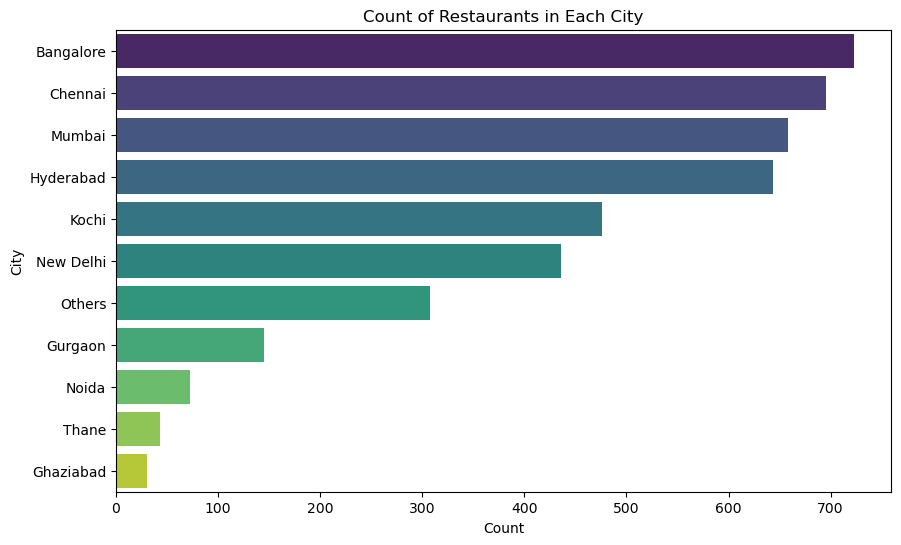

In [302]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CITY'], order=df['CITY'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of Restaurants in Each City')
plt.show()


# LOCALITY
We'll opt to drop the LOCALITY column since nearly all the values in this feature are unique. Given that, it wouldn't significantly influence the cost of food nationwide. However, if we were predicting the average dining price on a state level, the location feature would be more relevant.

In [303]:
df.LOCALITY.value_counts()

LOCALITY
Kakkanad                84
Kukatpally              54
Whitefield              53
Madhapur                52
Gachibowli              50
                        ..
Kengeri                  1
Ambernath                1
Near Rammurthy Nagar     1
Anna Nagar               1
Perry Cross Road         1
Name: count, Length: 834, dtype: int64

In [304]:
# Drop the "LOCALITY" column
df.drop(columns=['LOCALITY'], inplace=True)


# VOTES

VOTES represents the total number of votes provided by customers for a specific restaurant. However, due to the presence of the string "votes" alongside the numerical value, the data type for VOTES is currently object. To clean this data, we need to remove the string and convert the VOTES column to numerical data type.

In [305]:
df['VOTES'].unique()

array(['564 votes', '61 votes', '350 votes', ..., '1697 votes',
       '749 votes', '1239 votes'], dtype=object)

In [306]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [307]:
df.VOTES

0        564.0
1         61.0
2        350.0
3       1445.0
4         23.0
         ...  
4225     287.0
4226     469.0
4227      53.0
4228       6.0
4229      63.0
Name: VOTES, Length: 4230, dtype: float64

# Ratings
Ratings reflect the quality of food, restaurant standards, and the types of cuisines served. In our dataset, establishments such as microbreweries, lounges, and clubs tend to receive high ratings, often correlating with higher dining prices. Ratings are typically numerical values ranging from 0 to 5, but in our dataset, the feature is of object datatype. This is due to missing values and the presence of 'New', indicating unrated restaurants, and '-' representing missing data, classified as "Dirty Data". To address this, we'll replace the "Dirty Data" with NaNs and convert the datatype of Ratings to float.

In [308]:
df['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [309]:
df['RATING'] = df['RATING'].str.replace('NEW', '3.7')
df['RATING'] = df['RATING'].str.replace('-', '3.7').astype(float)

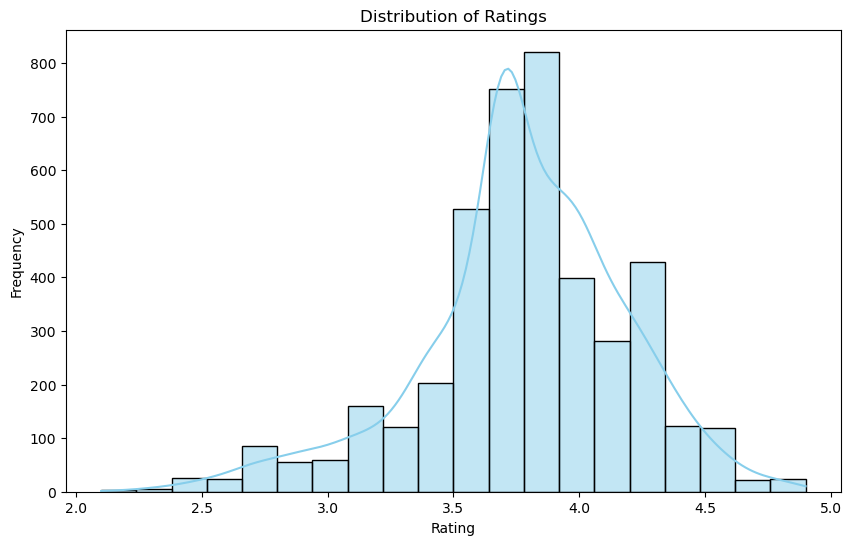

In [310]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


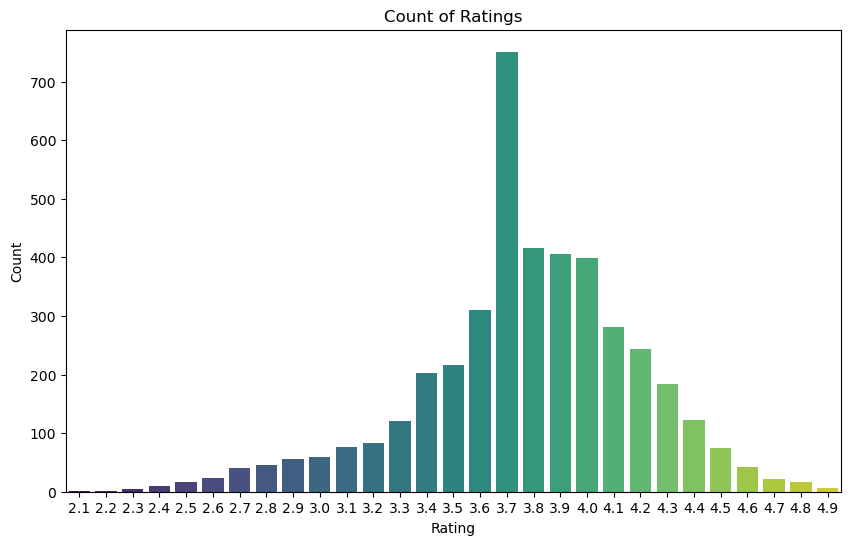

In [311]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RATING', data=df, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.show()

In [312]:
df.isna().sum()

index                      0
TITLE                      0
RESTAURANT_ID              0
CUISINES                   0
TIME                       0
CITY                       0
RATING                     0
VOTES                      0
n_indian_cuisine           0
s_indian_cuisine           0
chinese_cuisine            0
bakery_desserts_cuisine    0
fast_food_cuisine          0
regional_cuisine           0
beverage_cuisine           0
non_indian_cuisine         0
dtype: int64

In [313]:
df

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,4.3,564.0,1,0,1,0,0,0,0,0
1,1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,4.2,61.0,1,1,0,0,1,0,0,0
2,2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,3.8,350.0,1,0,1,0,0,0,0,1
3,3,QUICK BITES,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Others,3.8,1445.0,0,0,0,0,0,1,0,0
4,4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,3.6,23.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,3.9,287.0,1,0,1,0,0,0,0,0
4226,4227,QUICK BITES,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,4.3,469.0,1,0,0,0,0,0,0,0
4227,4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Others,3.7,53.0,1,0,0,0,0,0,0,1
4228,4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,3.7,6.0,0,0,0,0,1,0,1,0


In [314]:
df = df.drop('index', axis=1)

In [315]:
df = df.drop('RESTAURANT_ID', axis=1)

In [316]:
df = df.drop('TIME', axis=1)

In [317]:
df = df.drop('CUISINES', axis=1)

In [318]:
df.head()

,TITLE,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,Noida,4.3,564.0,1,0,1,0,0,0,0,0
1,QUICK BITES,Mumbai,4.2,61.0,1,1,0,0,1,0,0,0
2,CASUAL DINING,Mumbai,3.8,350.0,1,0,1,0,0,0,0,1
3,QUICK BITES,Others,3.8,1445.0,0,0,0,0,0,1,0,0
4,QUICK BITES,Kochi,3.6,23.0,0,1,0,0,0,0,0,0


In [319]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame containing categorical columns
categorical_cols = ['TITLE', 'CITY']

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [320]:
df

,TITLE,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,4,8,4.3,564.0,1,0,1,0,0,0,0,0
1,9,6,4.2,61.0,1,1,0,0,1,0,0,0
2,4,6,3.8,350.0,1,0,1,0,0,0,0,1
3,9,9,3.8,1445.0,0,0,0,0,0,1,0,0
4,9,5,3.6,23.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4225,4,7,3.9,287.0,1,0,1,0,0,0,0,0
4226,9,0,4.3,469.0,1,0,0,0,0,0,0,0
4227,9,9,3.7,53.0,1,0,0,0,0,0,0,1
4228,9,5,3.7,6.0,0,0,0,0,1,0,1,0


# Featutre scaling-

In [321]:
df

,TITLE,CITY,RATING,VOTES,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,4,8,4.3,564.0,1,0,1,0,0,0,0,0
1,9,6,4.2,61.0,1,1,0,0,1,0,0,0
2,4,6,3.8,350.0,1,0,1,0,0,0,0,1
3,9,9,3.8,1445.0,0,0,0,0,0,1,0,0
4,9,5,3.6,23.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4225,4,7,3.9,287.0,1,0,1,0,0,0,0,0
4226,9,0,4.3,469.0,1,0,0,0,0,0,0,0
4227,9,9,3.7,53.0,1,0,0,0,0,0,0,1
4228,9,5,3.7,6.0,0,0,0,0,1,0,1,0


In [322]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [323]:
x_scaled

array([[-0.7309024 ,  1.38003798,  1.27445632, ..., -0.23027081,
        -0.41402978, -0.61104552],
       [ 1.06974824,  0.68985582,  1.03228614, ..., -0.23027081,
        -0.41402978, -0.61104552],
       [-0.7309024 ,  0.68985582,  0.06360545, ..., -0.23027081,
        -0.41402978,  1.6365393 ],
       ...,
       [ 1.06974824,  1.72512905, -0.17856472, ..., -0.23027081,
        -0.41402978,  1.6365393 ],
       [ 1.06974824,  0.34476475, -0.17856472, ..., -0.23027081,
         2.4152852 , -0.61104552],
       [ 1.06974824,  1.72512905, -0.17856472, ..., -0.23027081,
        -0.41402978, -0.61104552]])

In [325]:
model=joblib.load("FinalModel_10.pkl")

prediction=model.predict(x_scaled)
prediction

array([1439.61119424,  328.54964637,  954.5629745 , ...,  469.41236862,
        284.92913596,  291.49233773])

In [326]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,1439.611194
1,328.549646
2,954.562975
3,460.722893
4,220.160838
...,...
4225,722.499719
4226,504.462857
4227,469.412369
4228,284.929136
